<a href="https://colab.research.google.com/github/artsasse/n_rainhas/blob/main/Tarefa_6_IA_Sasse_e_Ribas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa 6 - Resolvendo N-Rainhas com Algoritmo Genético**
Ciência da Computação - UFRJ 2021.2 \
Prof. João Carlos - Inteligência Artificial \
Arthur Mendonça Sasse - DRE 117206692 \
Gabriel Ribas Penha das Chagas - DRE 115165476


## 0. Importando as bibliotecas necessárias

In [ ]:
import random
import matplotlib.pyplot as plt
from statistics import mean

## 1. Modelagem

*Descreva como um tabuleiro N × N com N rainhas é representado no seu programa. Justifique a escolha desta representação.*

#####RESPOSTA: 
Representamos um tabuleiro N × N com N rainhas como uma lista de N inteiros, onde cada inteiro na N-ésima posição representa a posição da rainha na N-ésima coluna. Ou seja, necessariamente em cada coluna temos uma rainha. Consideramos que a casa no canto superior esquerdo está na linha 1 e coluna 1.

Exemplo: um tabuleiro de 5 rainhas onde cada rainha está na diagonal que vai do canto superior esquerdo ao canto superior direito ficaria assim: 
[1, 2, 3, 4, 5]

In [ ]:
# Tabuleiro 4 x 4 (versao sem classe)
tab4 = [3, 2, 1, 4]

## 2. Implementação Base

*As seguintes funções devem ser implementadas de maneira que possam ser testadas individualmente.*

### (a) 
*Defina a função tabuleiro que gere aleatoriamente um ou mais tabuleiros N × N com N rainhas. A entrada desta função deve ser o número de rainhas N e a quantidade de tabuleiros Q que devem ser gerados. Exemplo: tabuleiro(8, 10) deve gerar aleatoriamente 10 tabuleiros de tamanho 8 × 8. Os tabuleiros gerados devem estar de acordo com a modelagem definida no item anterior.*

In [ ]:
# Retornar lista de listas (versao sem classe)
def tabuleiro(qtd, n_rainhas):
  # Cria lista de tabuleiros
  lista_tab = []

  # Para cada tabuleiro
  for i in range(qtd):
    # Cria um tabuleiro
    tabuleiro = []
    # Para cada coluna do tabuleiro
    for j in range(n_rainhas):
      # Adiciona uma posicao aleatoria da rainha na coluna
      posicao = random.randint(1, n_rainhas)
      tabuleiro.append(posicao)
    # Adiciona tabuleiro completo na lista
    lista_tab.append(tabuleiro.copy())
  # Retorna a lista de tabuleiros
  return lista_tab

# Exemplo de uso
tabuleiro(3, 10)

[[4, 10, 10, 10, 7, 1, 8, 4, 5, 1],
 [10, 4, 3, 2, 5, 1, 4, 10, 6, 6],
 [9, 9, 2, 2, 8, 5, 10, 3, 2, 4]]

### (b) 
*Defina a função todosVizinhos que dado um tabuleiro qualquer T, retorna todos os tabuleiros vizinhos a T .*

In [ ]:
def todos_vizinhos(tabuleiro):
  # Cria lista de tabuleiros vizinhos
  vizinhos = []
  # Pega o tamanho do tabuleiro
  n = len(tabuleiro)

  # Para cada coluna/rainha do tabuleiro
  for i in range(n):
    # Para cada linha do tabuleiro
    for j in range(n):
      # Copia o tabuleiro original
      vizinho = tabuleiro.copy()
      # Verifica se a linha j é diferente da linha atual da rainha
      if j != tabuleiro[i]:
        # Move a rainha para outra linha
        vizinho[i] = j
        # Adiciona o vizinho na lista
        vizinhos.append(vizinho)

  # Retorna a lista de vizinhos
  return vizinhos

# Exemplo de uso
tab = tabuleiro(1, 4)[0]
print(f"Tabuleiro Original: {tab}")
vizinhos = todos_vizinhos(tab)
print("Vizinhos:")
for v in vizinhos:
  print(f"{v}")

Tabuleiro Original: [2, 2, 4, 4]
Vizinhos:
[0, 2, 4, 4]
[1, 2, 4, 4]
[3, 2, 4, 4]
[2, 0, 4, 4]
[2, 1, 4, 4]
[2, 3, 4, 4]
[2, 2, 0, 4]
[2, 2, 1, 4]
[2, 2, 2, 4]
[2, 2, 3, 4]
[2, 2, 4, 0]
[2, 2, 4, 1]
[2, 2, 4, 2]
[2, 2, 4, 3]


### (c) 
*Defina a função umVizinho que dado um tabuleiro qualquer T, retorna um dos vizinhos de T. A escolha do vizinho a ser retornado pela função deve ser aleatória.*

In [ ]:
def um_vizinho(tabuleiro):
  # Pega o tamanho do tabuleiro
  n = len(tabuleiro)

  # Pega uma coluna/rainha aleatoria do tabuleiro
  col = random.randint(0, n - 1)

  # Pega uma posicao aleatoria que nao esteja ocupada pela rainha nessa coluna
  posicao = random.randint(1, n)
  while(posicao == tabuleiro[col]):
    posicao = random.randint(1, n)

  # Gera o vizinho, movendo a rainha aleatoria para a posicao aleatoria
  vizinho = tabuleiro.copy()
  vizinho[col] = posicao

  # Retorna o vizinho
  return vizinho

# Exemplo de uso
tab = tabuleiro(1, 4)[0]
print(f"Tabuleiro Original: {tab}")
print("Vizinhos aleatorios:")
for i in range(4):
  vizinho = um_vizinho(tab)
  print(f"{vizinho}")

Tabuleiro Original: [1, 4, 4, 4]
Vizinhos aleatorios:
[2, 4, 4, 4]
[3, 4, 4, 4]
[1, 4, 3, 4]
[1, 4, 2, 4]


### (d) 
*Defina a função numeroAtaques que dado um tabuleiro qualquer T, retorna o número de ataques entre as rainhas de T. A função deve contar apenas uma vez a quantidade de ataques entre as rainhas. Exemplo: se a rainha A ataca a rainha B, então B ataca A. Conte isso como 1 ataque.*

#####OBS: 
Se 3 rainhas estão numa mesma linha, contamos que há 3 ataques no total. Ou seja, também contamos os ataques, mesmo que haja uma terceira rainha entre as 2 atacantes.

#####OBS 2:
Para evitar contar ataques repetidos, sempre analisamos o tabuleiro da esquerda para a direita. 

In [ ]:
def numero_ataques(tabuleiro):
  # Contador de ataques
  ataques = 0

  # Pega o tamanho do tabuleiro
  n = len(tabuleiro)

  # Para cada coluna/rainha
  for col in range(n):
    # Para cada coluna/rainha à direita
    for col2 in range(col + 1, n):
      # Verifica se tem outra rainha na mesma linha
      if(tabuleiro[col] == tabuleiro[col2]):
        ataques += 1
        continue
      # Calcula distância entre colunas (distancia horizontal)
      col_dist = col2 - col
      # Calcula distância entre linhas (distancia vertical)
      lin_dist = abs(tabuleiro[col] - tabuleiro[col2])
      # Verifica se tem outra rainha na diagonal
      if(col_dist == lin_dist):
        ataques += 1
  
  # Retorna o numero de ataques
  return ataques

# Exemplo de uso
tab = tabuleiro(1, 4)[0]
print(f"Tabuleiro: {tab}")
ataques = numero_ataques(tab)
print(f"Número de ataques: {ataques}")

Tabuleiro: [3, 2, 1, 2]
Número de ataques: 5


## 5. Algoritmo Genético

### (a)
*Você deve implementar o algoritmo genético básico apresentado em aula. Você deve usar a modelagem do tabuleiro e as funções tabuleiro e numeroAtaques definidas anteriormente.*

### (b)
*Defina uma função que dado o tamanho n de uma população, gera aleatoriamente um conjunto de n indivíduos.*

##### OBS:
Seguindo a orientação do livro passado em aula, decidimos manter os genes como os números inteiros que representam a posição das rainhas em cada coluna. Fizemos isso porque uma representação binária introduziria um viés, onde certos números/posições teriam mais chances de aparecer do que outros durante o crossover ou mutação.

In [ ]:
N_RAINHAS = 8
def gera_populacao(n):
  return tabuleiro(n, N_RAINHAS)

# Exemplo de uso
gera_populacao(3)

[[2, 1, 8, 6, 4, 3, 4, 6], [7, 1, 1, 2, 3, 6, 2, 6], [8, 7, 3, 4, 1, 6, 1, 8]]

### (c) Operadores
*Defina as seguintes funções:*

####   Função de adaptação usada para avaliar um tabuleiro T.

##### OBS:
Seguindo a orientação do livro passado pelo professor, decidimos que a função de adaptação será o número de pares de rainhas não-atacantes (que não se atacam). 

\

Para cada tabuleiro de N rainhas é possível calcular o número de pares de rainhas atacantes com a função ```numero_ataques``` e o número máximo desses pares é dado pela combinação ${N\choose 2} = \frac{N (N - 1)}{2}$.

\

Logo o número de rainhas não-atacantes em um tabuleiro de N rainhas, é dado pelo número máximo de ataques num tabuleiro qualquer de N rainhas menos o número de ataques no tabuleiro atual.

\

No pior caso, a função de adaptação será zero (todas as rainhas se atacam) e seu valor máximo, quando encontrarmos uma solução, será $\frac{N (N - 1)}{2}$ (nenhuma rainha se ataca).




In [ ]:
def adaptacao(tabuleiro):
  # Pega o numero de rainhas
  n = len(tabuleiro)

  # Descobre o numero maximo de ataques
  max_ataques = n * (n - 1) / 2

  # Descobre o numero de ataques na configuracao atual
  ataques = numero_ataques(tabuleiro)

  # Retorna o numero de pares de rainhas nao-atacantes
  return int(max_ataques - ataques)

# Exemplo de uso
tab = tabuleiro(1, 4)[0]
print(f"Tabuleiro = {tab}")
print(f"Adaptação = {adaptacao(tab)}")

Tabuleiro = [4, 2, 3, 4]
Adaptação = 2


#### Função que dada uma população P, constrói a roleta viciada correspondente a P.

##### OBS:
Geramos uma distribuição a partir dos valores da função de adaptação (pesos) para cada tabuleiro da população. 

Utilizamos o peso acumulado em vez dos próprios pesos porque segundo a [documentação](https://docs.python.org/3/library/random.html#random.choices) da função ```choices``` (que será usada para selecionar indivíduos da roleta), isso poupa trabalho.

In [ ]:
def roleta(populacao):
  # Lista de pesos acumulados
  pesos = []
  # Peso acumulado atual
  peso = 0
  # Preenche a lista de pesos acumulados
  for tabuleiro in populacao:
    peso += adaptacao(tabuleiro)
    pesos.append(peso)

  return pesos

# Exemplo de uso
N_RAINHAS = 4
pop = gera_populacao(3)
lista_pesos = [adaptacao(x) for x in pop]
print(f"População = {pop}")
print(f"Pesos Individuais = {lista_pesos}")
print(f"Pesos acumulados = {roleta(pop)}")

População = [[1, 1, 2, 2], [2, 2, 2, 4], [3, 2, 4, 2]]
Pesos Individuais = [3, 2, 4]
Pesos acumulados = [3, 5, 9]


#### Função que dada uma população P constrói uma população intermediária correspondente a P. (seleção)

In [ ]:
def gera_intermediaria(populacao):
  # Pega o numero k de individuos da populacao
  k = len(populacao)
  # Gera a roleta viciada
  pesos = roleta(populacao)
  # Escolhe k individuos da roleta viciada
  intermediaria = random.choices(population=populacao, cum_weights=pesos, k=k)
  # Retorna a populacao intermediaria
  return intermediaria

# Exemplo de uso
N_RAINHAS = 4
pop = gera_populacao(3)
lista_pesos = [adaptacao(x) for x in pop]
print(f"População = {pop}")
print(f"Pesos Individuais = {lista_pesos}")
print(f"População Intermediária = {gera_intermediaria(pop)}")

População = [[1, 1, 1, 2], [4, 2, 1, 2], [3, 1, 4, 1]]
Pesos Individuais = [2, 3, 5]
População Intermediária = [[4, 2, 1, 2], [3, 1, 4, 1], [4, 2, 1, 2]]


#### Função que faz o crossover entre dois indivíduos. (crossover)

##### OBS:

O ponto de corte indica a partir de qual gene (incluindo esse inicial) os cromossomos serão cortados.

Logo, o ponto de corte não pode ser zero (primeiro gene) nem o tamanho da lista (fim da lista).

In [ ]:
def crossover(i1, i2):
  # Pega o numero de genes dos individuos
  n_genes = len(i1)
  # Sorteia o ponto de corte dos cromossomos
  corte = random.randint(1, n_genes - 1)
  # Constroi o filho 1
  filho1 = i1[:corte] + i2[corte:]
  # Constroi o filho 2
  filho2 = i2[:corte] + i1[corte:]
  # Retorna os filhos
  return [filho1, filho2]

# Exemplo de uso
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]
crossover(x, y)

[[1, 2, 3, 40], [10, 20, 30, 4]]

#### Função que faz a mutação em um dado indivíduo. (mutação)

##### OBS:
Nesse caso o número *n* de genes **coincidentemente** é igual ao número *n* de linhas dos tabuleiros, graças a representação que escolhemos para os indivíduos.

In [ ]:
def mutacao(individuo):
  # Pega o numero de genes do individuos / numero de linhas do tabuleiro
  n = len(individuo)
  # Sorteia o gene que vai sofrer mutacao
  mutado = random.randint(0, n - 1)
  # Busca aleatoriamente um valor diferente para o gene
  posicao = random.randint(1, n)
  while(individuo[mutado] == posicao):
    posicao = random.randint(1, n)
  # Modifica o valor do gene
  individuo[mutado] = posicao

# Exemplo de uso
individuo = [1, 2, 3, 4]
mutacao(individuo)
print(individuo)

[1, 2, 2, 4]


### (d) Algoritmo Genético Básico
*Sua implementação deve ter como parâmetros de entrada:*


*   *Tamanho da população*
*   *Número de gerações*
*   *Probabilidade de Crossover*
*   *Probabilidade de Mutação*
*   *Utilização de Elitismo: no elitismo, uma cópia do melhor indivíduo da geração $P_{i−1}$ é passada para a geração $P_{i}$, sem passar pelos operadores.*

*A saída de uma execução do programa deve ser composta por 2 gráficos:*
*   *Geração × função de adaptação do melhor indivíduo da geração*
*   *Geração × média da função de adaptação dos indivíduos da geração*

*E o melhor indivíduo da última geração e o valor da sua função de adaptação.*

##### Função auxiliar para o elitismo

In [ ]:
def elitiza_pop(pop, pop_intermediaria):
  # Pega o tamanho da populacao
  tam_pop = len(pop)
  # Monta a lista com os valores de adaptacao da ultima geracao
  lista_adaptacao = [adaptacao(x) for x in pop]
  # Pega o indice do individuo com o maior valor de adaptacao
  indice_elite = lista_adaptacao.index(max(lista_adaptacao))
  # Seleciona um indice aleatorio da populacao intermediaria
  indice_aleatorio = random.randint(0, tam_pop - 1)
  # Substitui o individuo aleatorio pelo individuo da elite
  pop_intermediaria[indice_aleatorio] = pop[indice_elite]

# Exemplo de uso
N_RAINHAS = 4
pop1 = gera_populacao(3)
adaptacao1 = [adaptacao(x) for x in pop1]
print(f"Ultima geracao: {pop1}")
print(f"Adaptacao da ultima geracao: {adaptacao1}")
pop2 = gera_populacao(3)
adaptacao2 = [adaptacao(x) for x in pop2]
print(f"Populacao intermediaria: {pop2}")
elitiza_pop(pop1, pop2)
print(f"Populacao apos o elitismo: {pop2}")

Ultima geracao: [[4, 3, 2, 2], [1, 1, 2, 4], [4, 4, 4, 4]]
Adaptacao da ultima geracao: [2, 3, 0]
Populacao intermediaria: [[1, 1, 1, 3], [1, 1, 3, 1], [2, 2, 1, 1]]
Populacao apos o elitismo: [[1, 1, 2, 4], [1, 1, 3, 1], [2, 2, 1, 1]]


##### Função auxiliar para gerar uma nova população após o crossover

In [ ]:
def crossover_pop(pop, p_crossover):

  # Pega o tamanho da populacao
  tam_pop = len(pop)
  # Verifica se o tamanho da populacao é par
  if not(tam_pop % 2 == 0):
    # Se nao for, exige um tamanho par
    raise ValueError("O tamanho da população deve ser par.")

  # Inicia a populacao que vai guardar os resultados do crossover
  pop_cruzada = []

  # Cuidado: a lista recebida como argumento fica vazia
  # Enquanto houver individuos na populacao
  while pop:
    # Escolhe 2 individuos aleatorios
    ind1, ind2 = random.sample(pop, 2)
    # Remove os 2 individuos da populacao
    pop.remove(ind1)
    pop.remove(ind2)
    # Verifica se o crossover vai ser feito
    if random.random() <= p_crossover:
      # Faz o crossover com os 2 individuos selecionados
      filhos = crossover(ind1, ind2)
    # Senao, os proprios individuos vao para a proxima geracao
    else:
      filhos = [ind1, ind2]
    # Adiciona os filhos na lista de resultados
    pop_cruzada += filhos

  return pop_cruzada

# Exemplo de uso
pop = [['UM', 'DOIS', 'TRÊS', 'QUATRO'],[10, 20, 30, 40],['1', '2', '3', '4'],[1.0, 2.0, 3.0, 4.0]]
print(f"Populacao Original: {pop}")
print(f"Populacao apos crossover: {crossover_pop(pop, 0.5)}")

Populacao Original: [['UM', 'DOIS', 'TRÊS', 'QUATRO'], [10, 20, 30, 40], ['1', '2', '3', '4'], [1.0, 2.0, 3.0, 4.0]]
Populacao apos crossover: [[10, 20, 30, 'QUATRO'], ['UM', 'DOIS', 'TRÊS', 40], ['1', '2', '3', 4.0], [1.0, 2.0, 3.0, '4']]


##### Função auxiliar para gerar uma nova população após a mutação

In [ ]:
def mutacao_pop(pop, p_mutacao):
  # Inicia a populacao que vai guardar os resultados da mutacao
  pop_mutada = []

  # Para cada individuo original da populacao
  for individuo in pop:
    # Verifica se a mutacao vai ser feita
    if random.random() <= p_mutacao:
      # Faz copia do individuo
      copia_individuo = individuo.copy()
      # Faz a mutacao com o individuo selecionado
      mutacao(copia_individuo)
      # Adiciona o individuo na lista de resultados
      pop_mutada.append(copia_individuo)
    else:
      # Adiciona o individuo na lista de resultados
      pop_mutada.append(individuo)
  
  return pop_mutada

# Exemplo de uso
N_RAINHAS = 4
pop = gera_populacao(4)
print(f"Populacao Original: {pop}")
pop_mutada = mutacao_pop(pop, 0.5)
print(f"Apos mutacao: {pop_mutada}")

Populacao Original: [[4, 4, 4, 3], [4, 4, 4, 3], [1, 3, 4, 1], [3, 2, 1, 1]]
Apos mutacao: [[4, 4, 4, 3], [4, 4, 4, 2], [1, 3, 3, 1], [3, 2, 1, 1]]


##### Função auxiliar para calcular o valor máximo e a média da função de adaptação em uma população

In [ ]:
def max_e_media(pop):
  # Gera a lista com os valores da funcao de adaptacao
  lista_adaptacao = [adaptacao(x) for x in pop]
  # Pega o valor maximo de adaptacao
  max_adaptacao = max(lista_adaptacao)
  # Pega a media da lista de valores de adaptacao
  media_adaptacao = mean(lista_adaptacao)

  return max_adaptacao, media_adaptacao

# Exemplo de uso 
N_RAINHAS = 4
pop = gera_populacao(5)
print(f"Populacao: {pop}")
lista_adaptacao = [adaptacao(x) for x in pop]
print(f"Adaptacao: {lista_adaptacao}")
maximo, media = max_e_media(pop)
print(f"Max: {maximo}")
print(f"Media: {media}")

Populacao: [[3, 2, 1, 1], [2, 3, 4, 4], [4, 1, 2, 2], [2, 1, 2, 2], [2, 3, 4, 3]]
Adaptacao: [2, 2, 3, 1, 1]
Max: 3
Media: 1.8


##### Função auxiliar para gerar os gráficos


In [ ]:
def grafico_max_e_media(maximos, medias, max_funcao, far_view=False):
  # Pega o numero de geracoes
  n_geracoes = len(maximos)
  # Gera uma sequencia de geracoes, começando de 1
  geracoes = range(1, n_geracoes+1)
  
  # Define o layout do grafico
  fig, ax = plt.subplots(ncols=2, figsize=(15,6))

  # GRAFICO DE MAXIMOS
  # Eixo X: Geracoes / Eixo Y: Funcao de Adaptacao
  ax[0].plot(geracoes, maximos, 'g', linewidth=3.0)
  # Define os nomes para os eixos e o grafico
  ax[0].set_xlabel('Geração')
  ax[0].set_ylabel('Função de Adaptação')
  ax[0].set_title("Melhor Indivíduo")
  # Define os limites dos eixos para visualizacao
  if far_view:
    ax[0].set_xbound(1, n_geracoes)
    ax[0].set_ybound(0, max_funcao)
  # Ativa a visualizacao do grid
  ax[0].grid(True)
  # Define a linha do valor maximo da funcao (solucao)
  ax[0].plot([0, n_geracoes], [max_funcao, max_funcao], 'r--')
  ax[0].text(0.1, max_funcao - 0.05 * N_RAINHAS, 
             'Solução', color='red', fontsize=15)

  # GRAFICO DE MEDIAS
  # Eixo X: Geracoes / Eixo Y: Funcao de Adaptacao
  ax[1].plot(geracoes, medias, 'b', linewidth=3.0)
  # Define os nomes para os eixos e o grafico
  ax[1].set_xlabel('Geração')
  ax[1].set_ylabel('Função de Adaptação')
  ax[1].set_title("Média")
  # Define os limites dos eixos para visualizacao
  if far_view:
    ax[1].set_xbound(1, n_geracoes)
    ax[1].set_ybound(0, max_funcao)
  # Ativa a visualizacao do grid
  ax[1].grid(True)
  # Define a linha do valor maximo da funcao (solucao)
  ax[1].plot([0, n_geracoes], [max_funcao, max_funcao], 'r--')
  ax[1].text(0.1, max_funcao - 0.1 * N_RAINHAS, 
             'Solução', color='red', fontsize=15)

  plt.show()

##### Implementação do Algoritmo Genético Básico

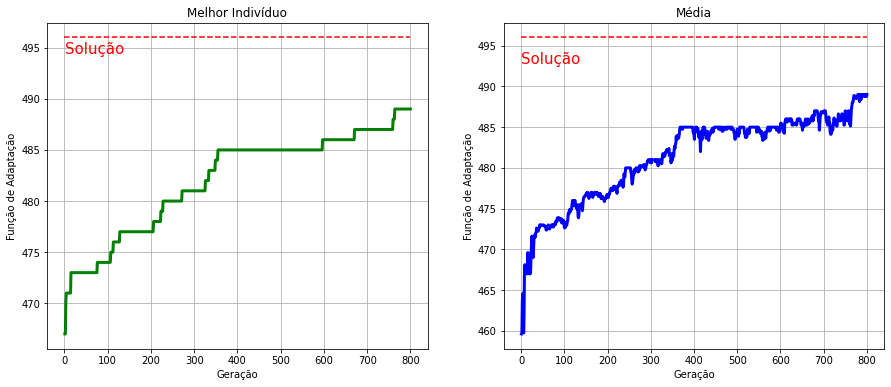


Indivíduo mais adaptado da última geração: [28, 7, 27, 16, 7, 22, 11, 6, 15, 17, 25, 5, 23, 31, 2, 12, 8, 13, 20, 1, 9, 4, 26, 32, 19, 21, 5, 14, 29, 10, 30, 3]
Valor da sua função de adaptação: 489



In [ ]:
def genetico(tam_pop, n_geracoes, p_crossover=0.8, p_mutacao=0.05, elitismo=False):

  # Verifica se o tamanho da populacao é par
  if not(tam_pop % 2 == 0):
    # Se nao for, exige um tamanho par
    raise ValueError("O tamanho da população deve ser par.")

  # Gera a populacao inicial
  pop = gera_populacao(tam_pop)
  # Calcula o valor maximo e a média dos valores de adaptacao
  max_inicial, media_inicial = max_e_media(pop)
  # Inicia as listas com valores maximos e medias de cada geracao
  maximos = [max_inicial]
  medias = [media_inicial]
  
  # Realiza as operacoes até um certo numero de geracoes
  # Subtrai 1 de n_geracoes por conta da geracao inicial
  for geracao in range(n_geracoes - 1): 
    # Gera a populacao intermediaria
    pop_intermediaria = gera_intermediaria(pop)
    # Realiza o crossover na populacao intermediaria
    pop_cruzada = crossover_pop(pop_intermediaria, p_crossover)
    # Realiza as mutacoes na populacao apos o crossover
    pop_mutada = mutacao_pop(pop_cruzada, p_mutacao)
    # Verifica se vai usar elitismo
    if elitismo:
      # Aplica o elitismo na populacao mutada
      elitiza_pop(pop, pop_mutada)
    # Atualiza a variavel da populacao atual para a proxima iteracao
    pop = pop_mutada
    # Calcula o valor maximo e a média dos valores de adaptacao
    max_adaptacao, media_adaptacao = max_e_media(pop)
    # Adiciona nas listas com valores maximos e medias de cada geracao
    maximos.append(max_adaptacao)
    medias.append(media_adaptacao)

  # Descobre o numero de rainhas utilizado
  n_rainhas = len(pop[0])
  # Descobre o maior valor possivel da funcao de adaptacao para n rainhas
  max_funcao = int(n_rainhas * (n_rainhas - 1) / 2)
  # Gera os 2 graficos
  grafico_max_e_media(maximos, medias, max_funcao)

  # Monta a lista com os valores de adaptacao da ultima geracao
  lista_adaptacao = [adaptacao(x) for x in pop]
  # Pega o indice do individuo com o maior funcao de adaptacao
  indice_max = lista_adaptacao.index(max_adaptacao)
  # Retorna o individuo mais adaptado e o valor da sua funcao de adaptacao
  resultado = [pop[indice_max], max_adaptacao]
  print(f"\nIndivíduo mais adaptado da última geração: {resultado[0]}")
  print(f"Valor da sua função de adaptação: {resultado[1]}\n")

# Exemplo de uso
N_RAINHAS = 32
genetico(8, 800, 0.8, 0.05, True)

### (e)
*Considere o problema das 4 rainhas.*

#### i.
*Defina um conjunto de valores para os parâmetros tamanho da população, número de gerações, probabilidade de crossover e probabilidade de mutação, e execute o programa 10 vezes sem elitismo e 10 vezes com elitismo. Alguma solução foi encontrada? Comente os resultados obtidos.*

##### Sem Elitismo

Rodamos 10 vezes sem elitismo e encontramos solução em apenas 2 execuções (não necessariamente na última geração).
Em muitos casos, a média e o valor do melhor indivíduo pioram ao longo das gerações.

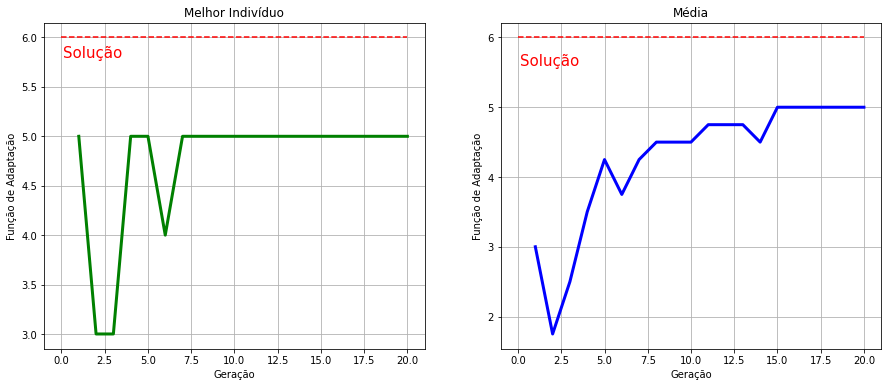


Indivíduo mais adaptado da última geração: [2, 4, 1, 1]
Valor da sua função de adaptação: 5



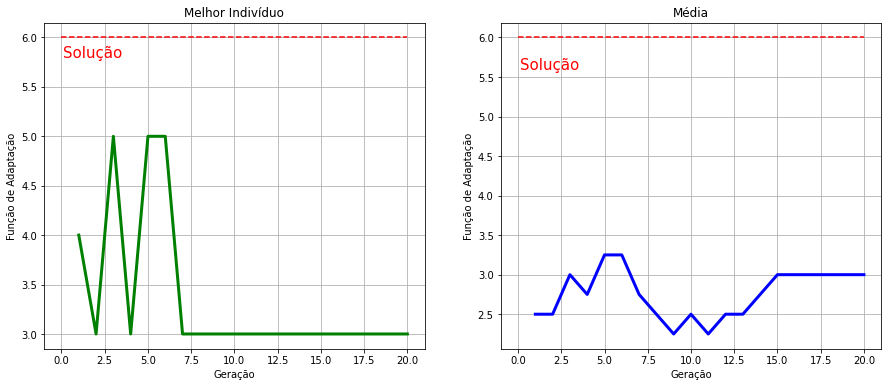


Indivíduo mais adaptado da última geração: [2, 1, 1, 3]
Valor da sua função de adaptação: 3



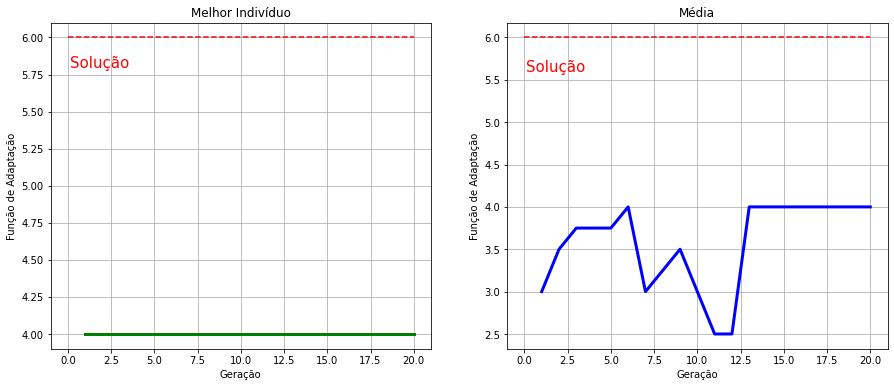


Indivíduo mais adaptado da última geração: [2, 1, 3, 4]
Valor da sua função de adaptação: 4



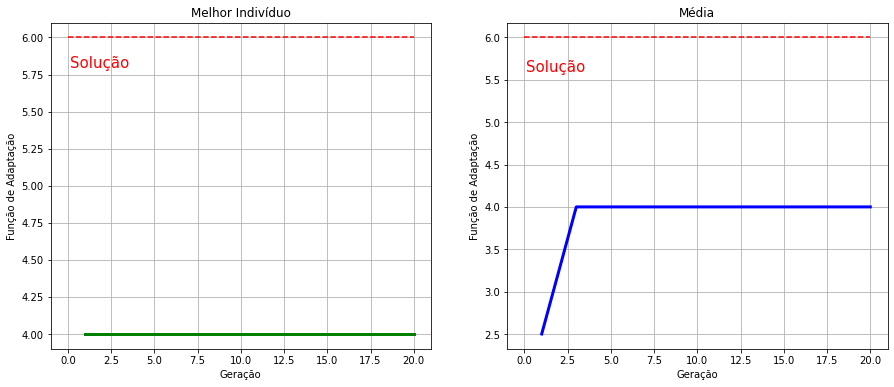


Indivíduo mais adaptado da última geração: [4, 3, 1, 2]
Valor da sua função de adaptação: 4



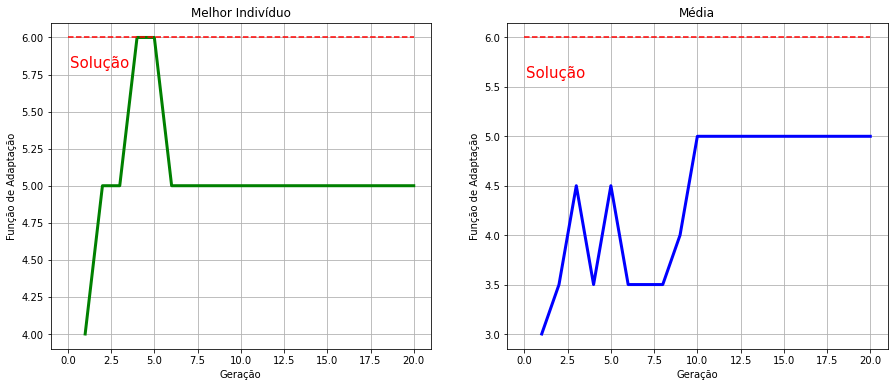


Indivíduo mais adaptado da última geração: [2, 4, 1, 1]
Valor da sua função de adaptação: 5



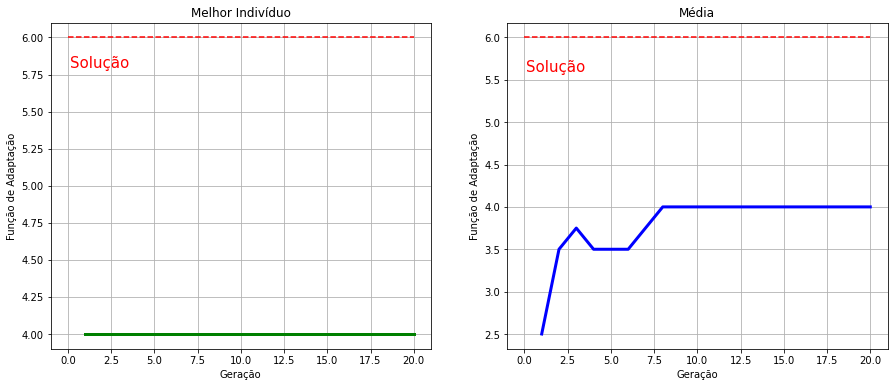


Indivíduo mais adaptado da última geração: [4, 1, 1, 2]
Valor da sua função de adaptação: 4



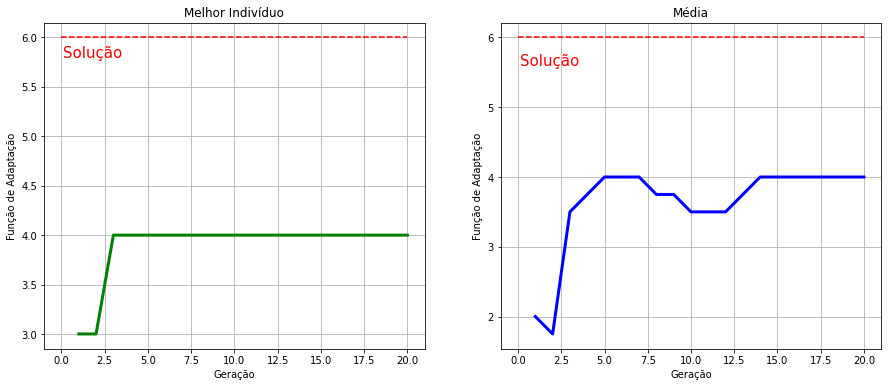


Indivíduo mais adaptado da última geração: [1, 3, 1, 3]
Valor da sua função de adaptação: 4



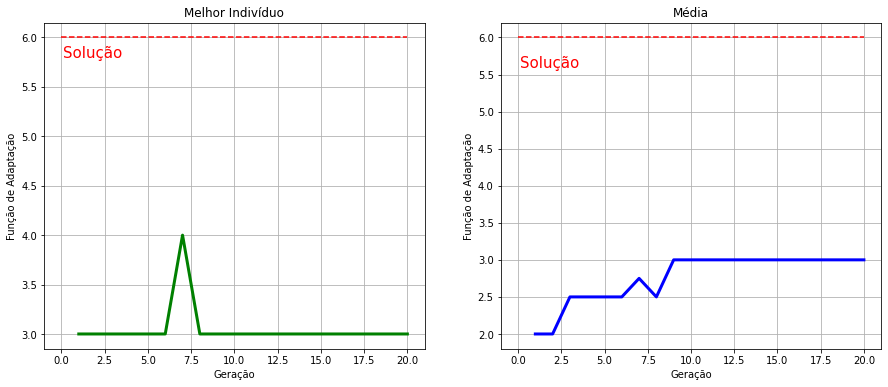


Indivíduo mais adaptado da última geração: [2, 1, 3, 3]
Valor da sua função de adaptação: 3



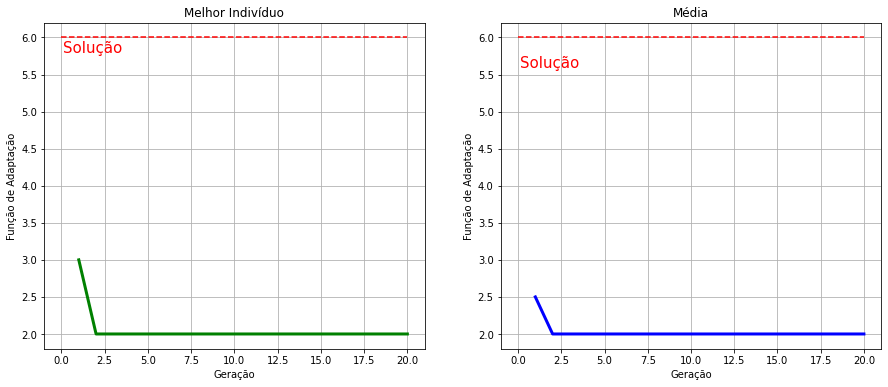


Indivíduo mais adaptado da última geração: [3, 3, 3, 2]
Valor da sua função de adaptação: 2



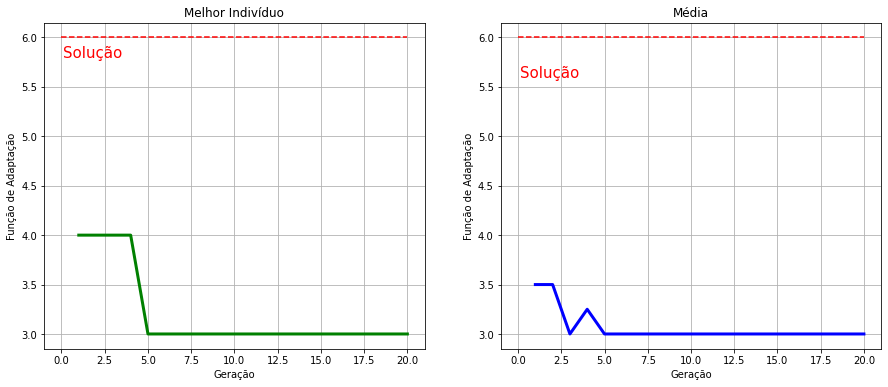


Indivíduo mais adaptado da última geração: [1, 3, 4, 3]
Valor da sua função de adaptação: 3



In [ ]:
N_RAINHAS = 4
for i in range(10):
  genetico(tam_pop=4, n_geracoes=20, p_crossover=0.7, p_mutacao=0.01, elitismo=False)

##### Com Elitismo
Rodamos 10 vezes com elitismo e encontramos solução em apenas 1 execução. Dessa vez, o gráfico do valor de adaptação do melhor indivíduo foi não-decrescente. Isso acontece porque o elitismo permite que o melhor indivíduo seja sempre passado para as gerações adiante, ou seja, se achamos a solução em alguma geração intermediária, não temos o risco de perdê-la na última geração.

A própria média também foi praticamente não-decrescente durante a maioria dos casos, embora isso não seja uma regra.

O fato de termos encontrado menos soluções com o elitismo pode ser um sinal de que ele aumenta os riscos de o algoritmo ficar "preso" em um máximo local e nunca chegar no máximo global.


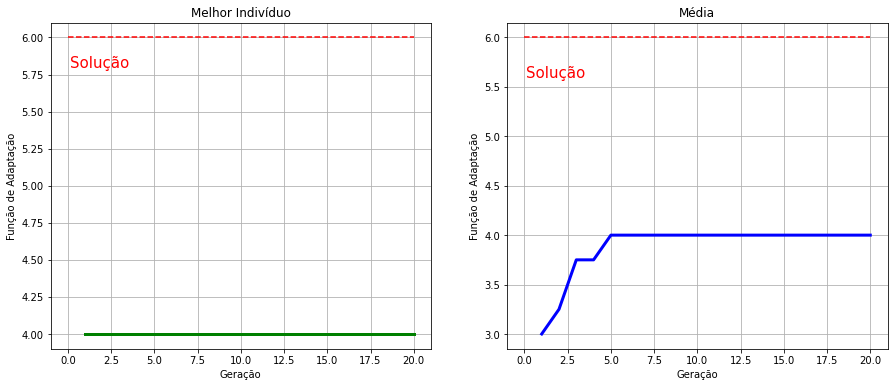


Indivíduo mais adaptado da última geração: [2, 1, 1, 4]
Valor da sua função de adaptação: 4



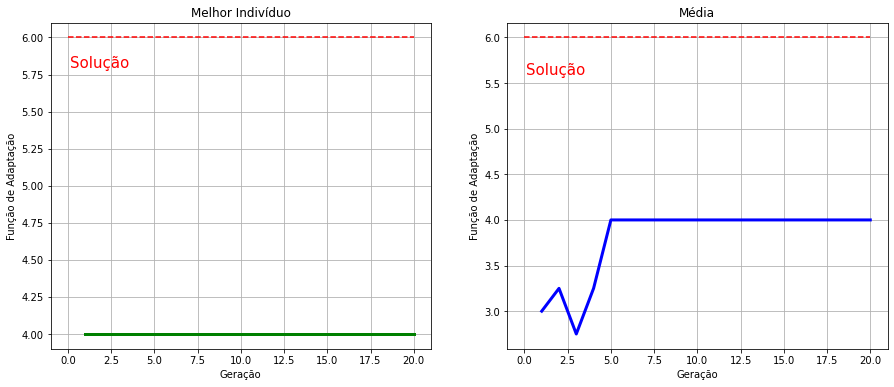


Indivíduo mais adaptado da última geração: [3, 1, 2, 2]
Valor da sua função de adaptação: 4



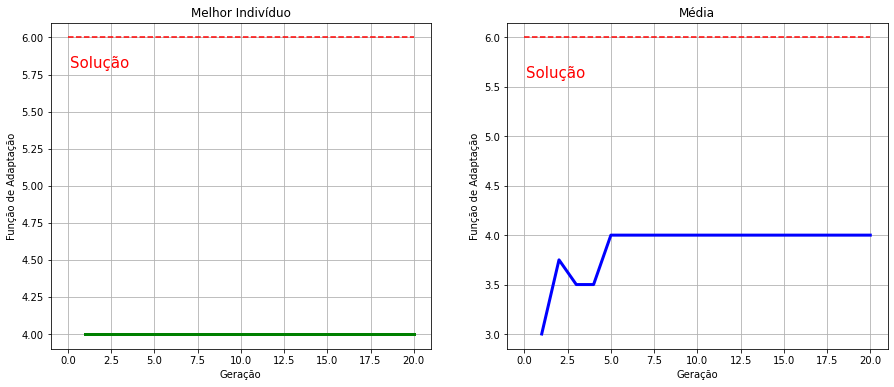


Indivíduo mais adaptado da última geração: [4, 1, 1, 2]
Valor da sua função de adaptação: 4



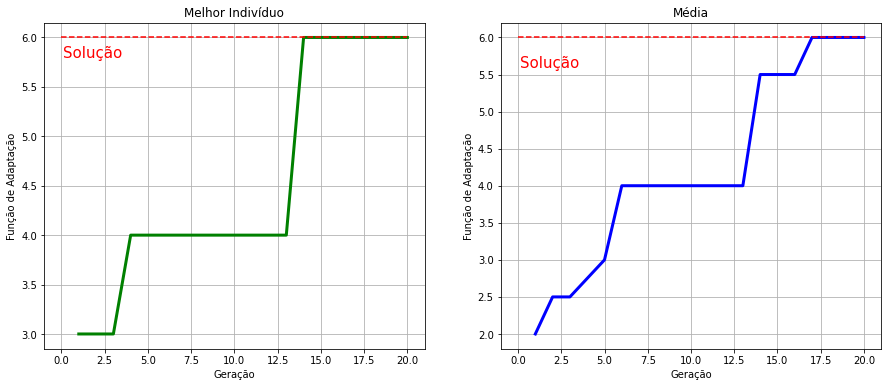


Indivíduo mais adaptado da última geração: [2, 4, 1, 3]
Valor da sua função de adaptação: 6



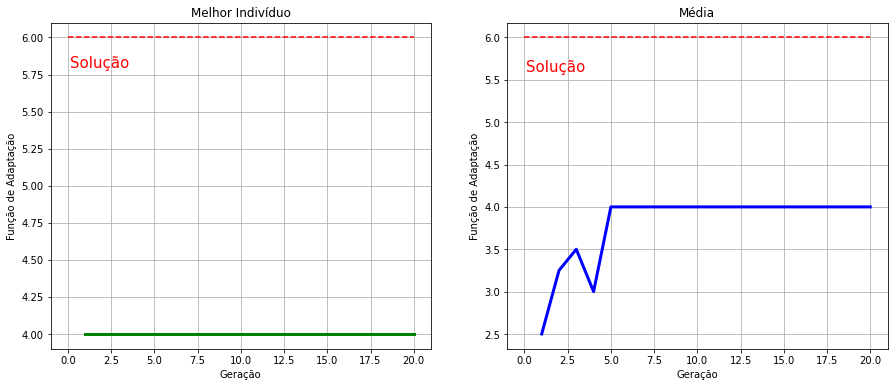


Indivíduo mais adaptado da última geração: [1, 4, 4, 3]
Valor da sua função de adaptação: 4



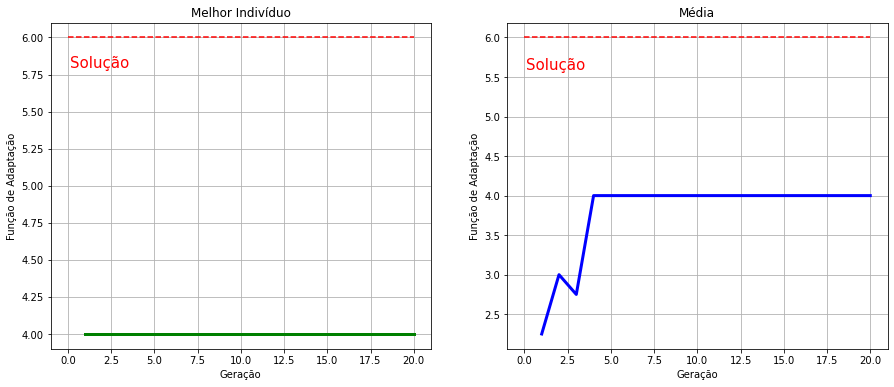


Indivíduo mais adaptado da última geração: [1, 3, 2, 2]
Valor da sua função de adaptação: 4



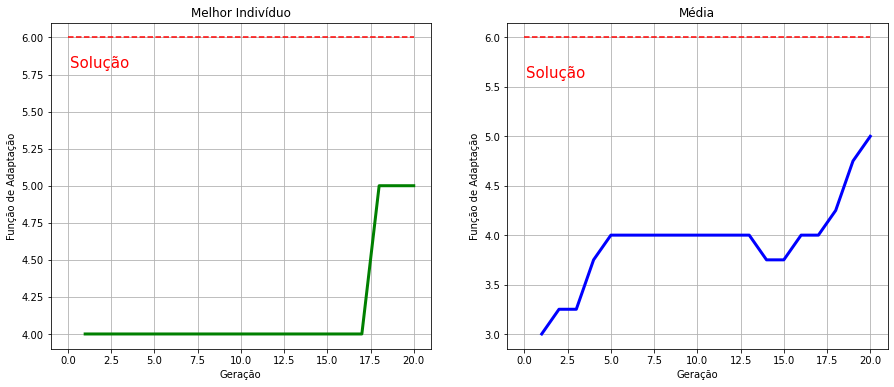


Indivíduo mais adaptado da última geração: [4, 2, 1, 3]
Valor da sua função de adaptação: 5



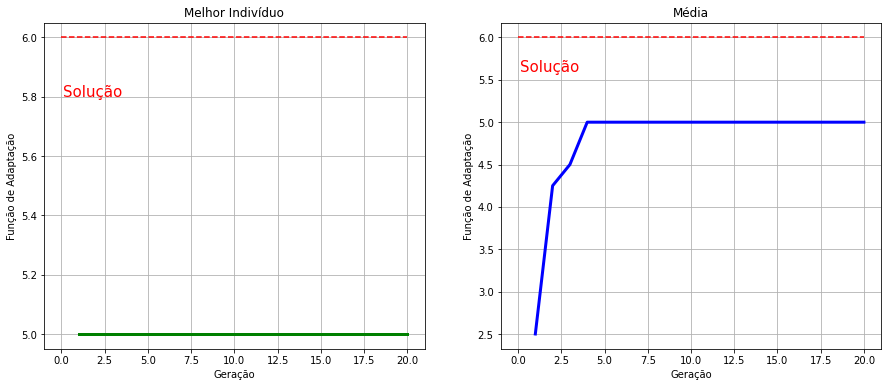


Indivíduo mais adaptado da última geração: [2, 4, 1, 4]
Valor da sua função de adaptação: 5



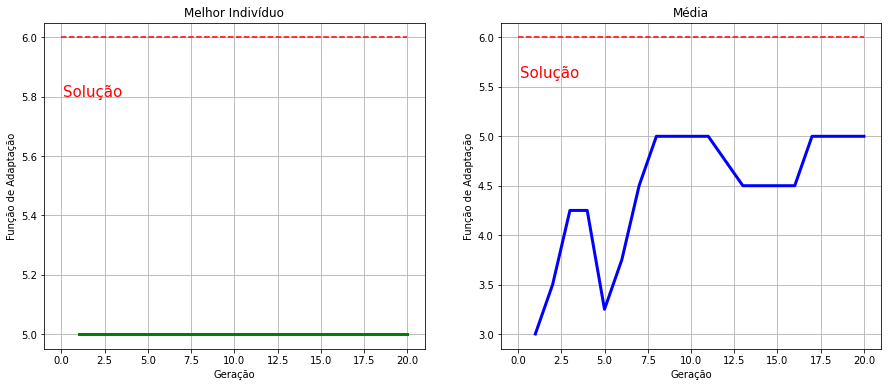


Indivíduo mais adaptado da última geração: [1, 4, 2, 3]
Valor da sua função de adaptação: 5



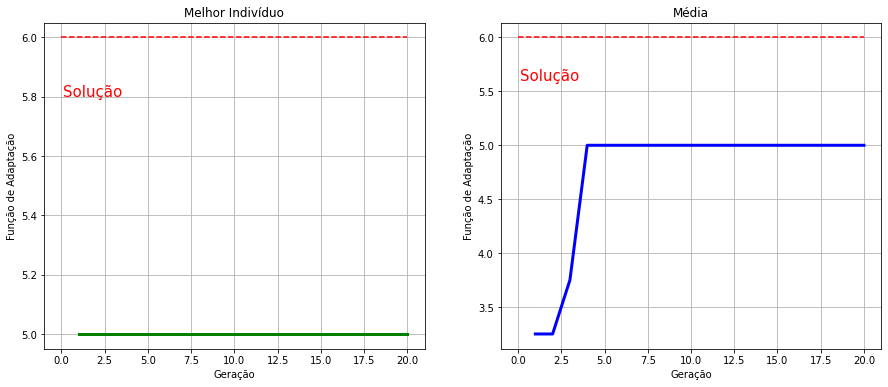


Indivíduo mais adaptado da última geração: [4, 2, 1, 3]
Valor da sua função de adaptação: 5



In [ ]:
N_RAINHAS = 4
for i in range(10):
  genetico(tam_pop=4, n_geracoes=20, p_crossover=0.7, p_mutacao=0.01, elitismo=True)

#### ii.
*Repita o caso anterior, alterando os valores dos parâmetros de entrada (um de cada vez) e verifique o que ocorre. Execute o programa 10 vezes para o caso com elitismo. Justifique os valores escolhidos e comente os resultados obtidos.*

##### Tamanho da População

**Quadruplicamos a população, de 4 para 16 indivíduos.**

Chegamos a solução em 3 execuções, o que indica que quanto maior a população maior a chance de encontrarmos soluções. Obviamente esse ganho é limitado pelos custos de tempo e memória ao aumentarmos a população, que nesse exemplo não são tão perceptíveis.

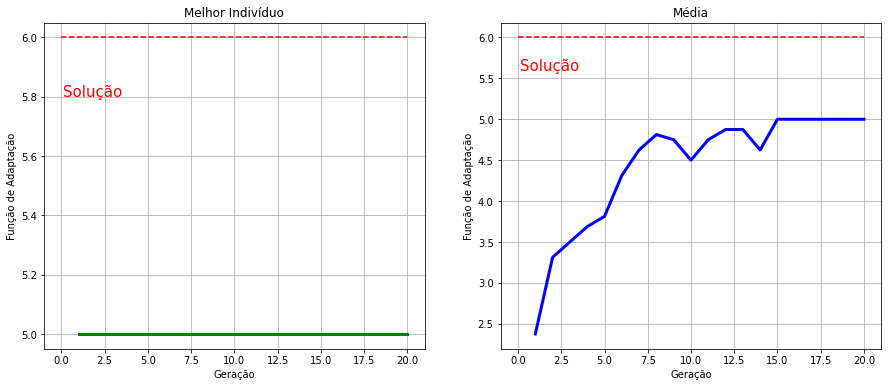


Indivíduo mais adaptado da última geração: [2, 4, 3, 1]
Valor da sua função de adaptação: 5



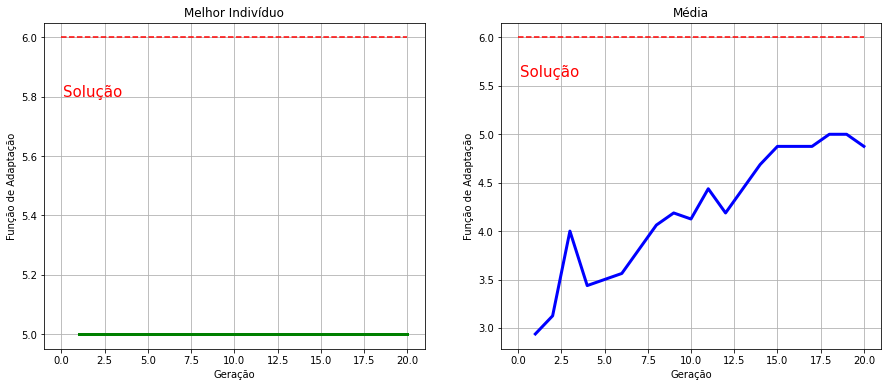


Indivíduo mais adaptado da última geração: [4, 1, 4, 2]
Valor da sua função de adaptação: 5



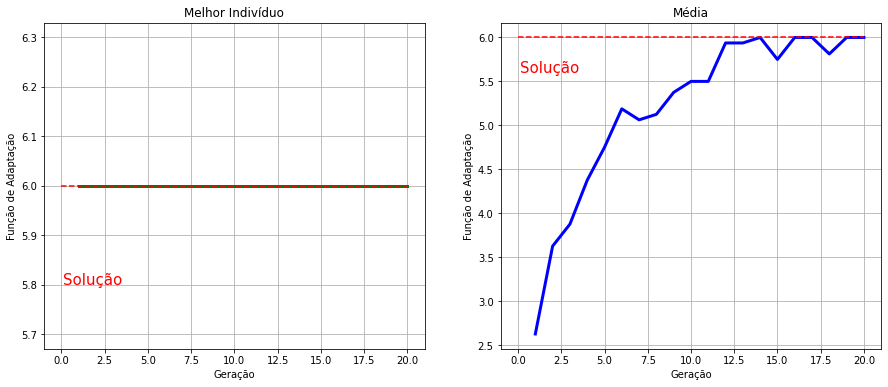


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



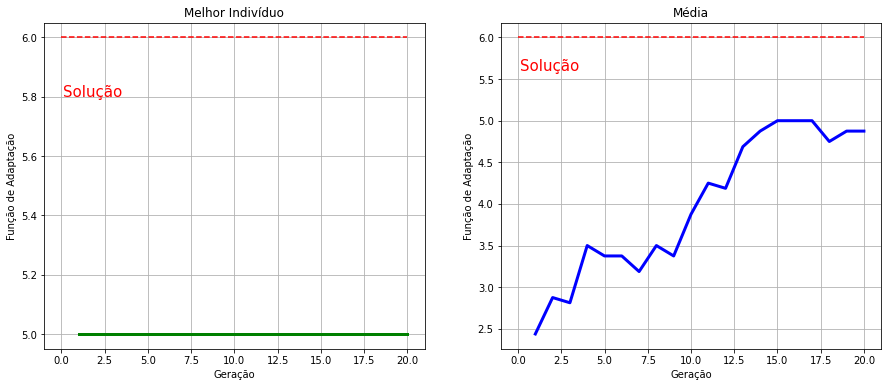


Indivíduo mais adaptado da última geração: [2, 3, 1, 4]
Valor da sua função de adaptação: 5



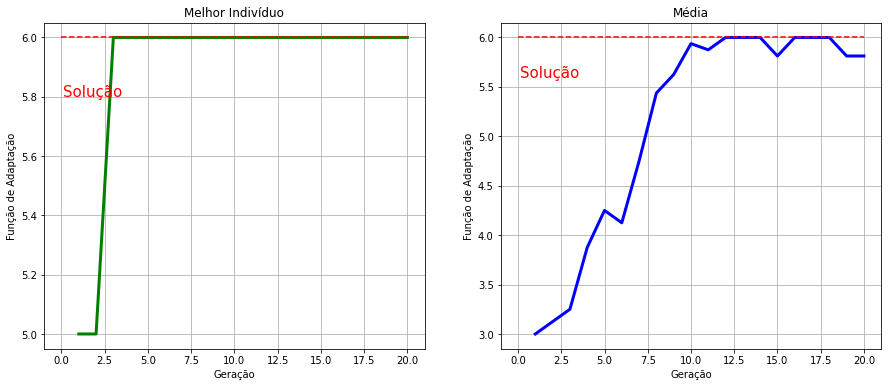


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



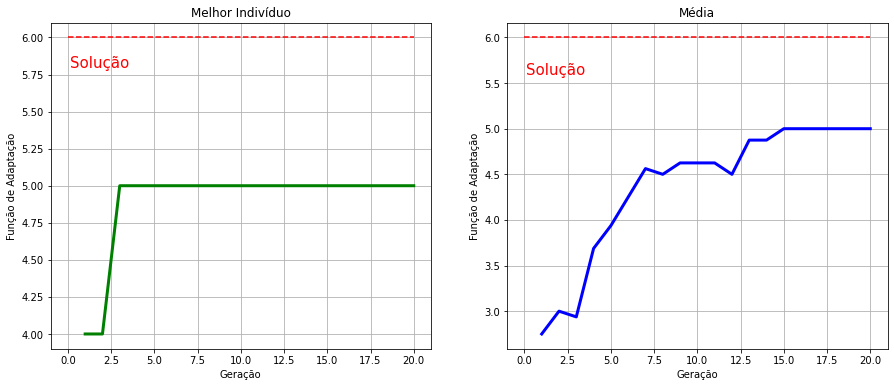


Indivíduo mais adaptado da última geração: [1, 4, 2, 3]
Valor da sua função de adaptação: 5



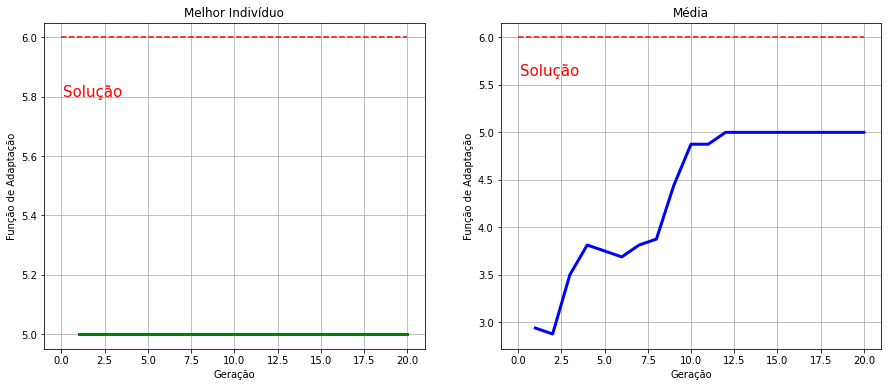


Indivíduo mais adaptado da última geração: [1, 4, 1, 3]
Valor da sua função de adaptação: 5



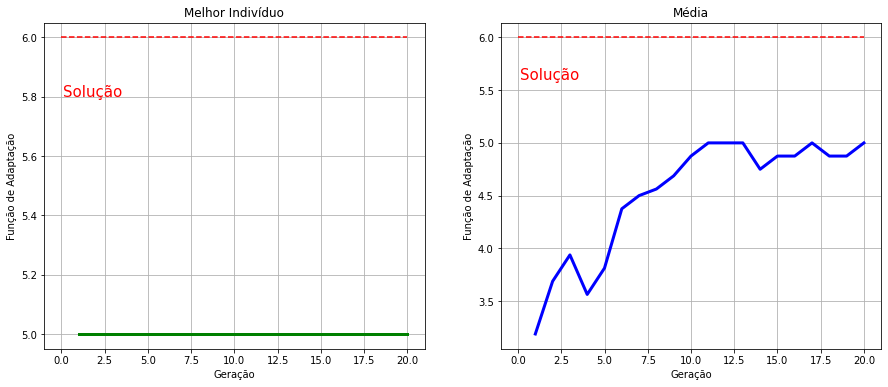


Indivíduo mais adaptado da última geração: [3, 1, 4, 1]
Valor da sua função de adaptação: 5



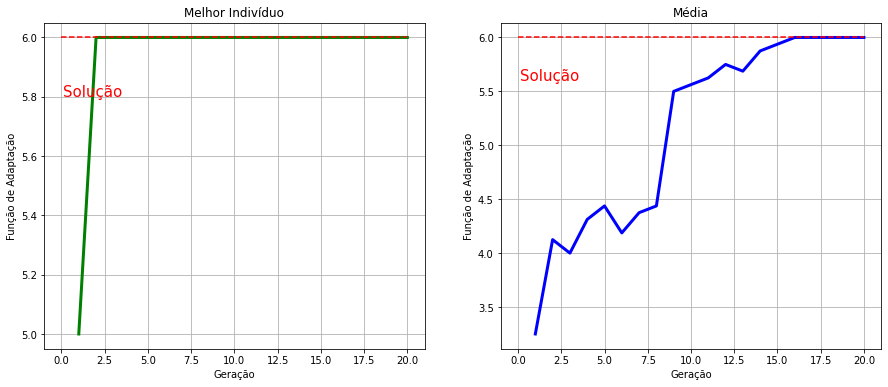


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



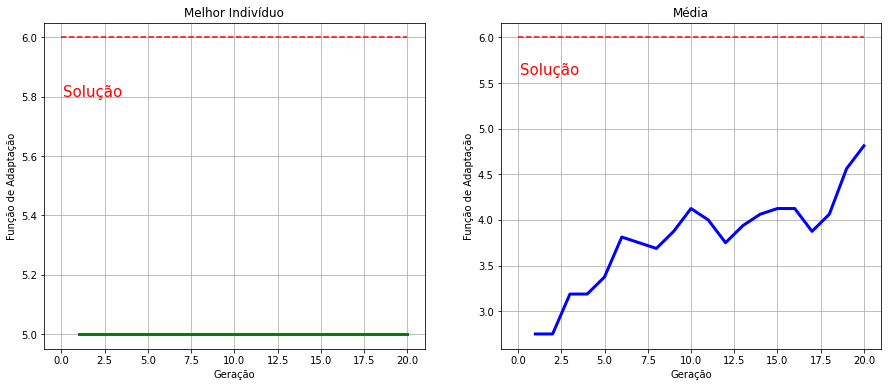


Indivíduo mais adaptado da última geração: [4, 2, 1, 3]
Valor da sua função de adaptação: 5



In [ ]:
for i in range(10):
  genetico(tam_pop=16, n_geracoes=20, p_crossover=0.7, p_mutacao=0.01, elitismo=True)

##### Número de Gerações

**Quadruplicamos o número de gerações, de 20 para 80 indivíduos.**

Esse aumento não foi tão efetivo quanto o aumento da população.
Não conseguimos chegar a nenhuma solução nas 10 execuções.

\
Talvez isso deva ao efeito de convergência do algoritmo genético.
Quando aumentamos a população, aumentamos a chance de haver bons indivíduos e de o crossover gerar combinações interessantes.

\
Mas quando aumentamos apenas o número de gerações, é possível que a partir de uma certa geração, os indivíduos fiquem muito parecidos e permaneçam assim ao longo das próximas gerações, que é análogo o que acontece na biologia quando pequenos grupos de seres vivos ficam isolados das outras populações.

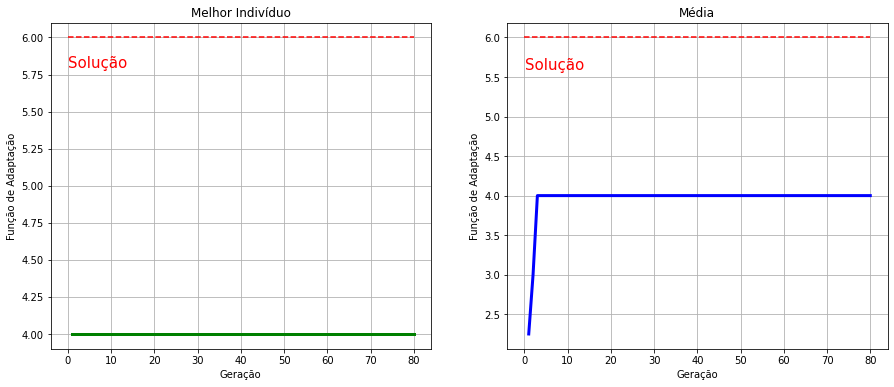


Indivíduo mais adaptado da última geração: [4, 2, 3, 1]
Valor da sua função de adaptação: 4



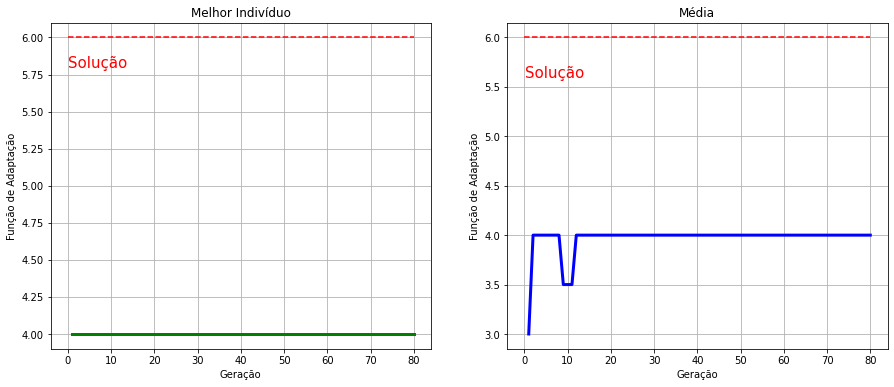


Indivíduo mais adaptado da última geração: [2, 4, 4, 1]
Valor da sua função de adaptação: 4



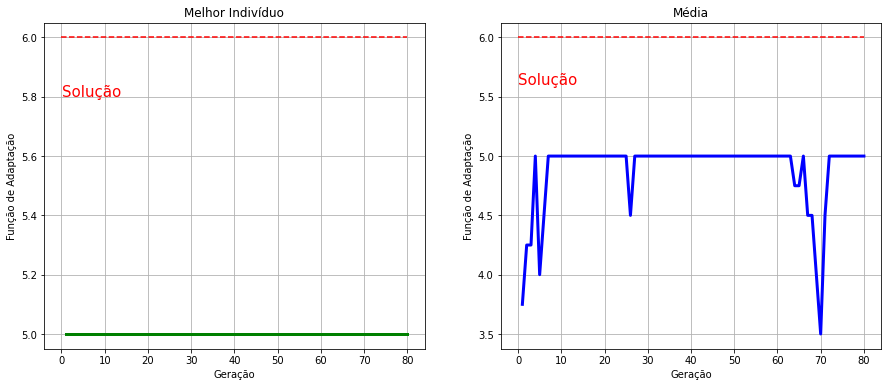


Indivíduo mais adaptado da última geração: [2, 4, 1, 1]
Valor da sua função de adaptação: 5



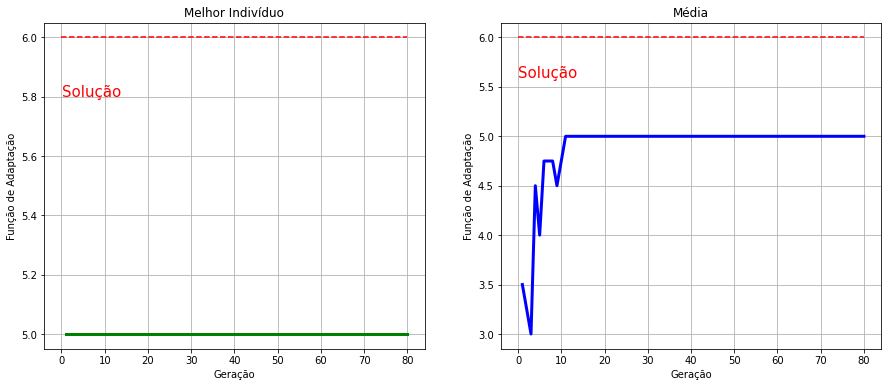


Indivíduo mais adaptado da última geração: [1, 4, 2, 3]
Valor da sua função de adaptação: 5



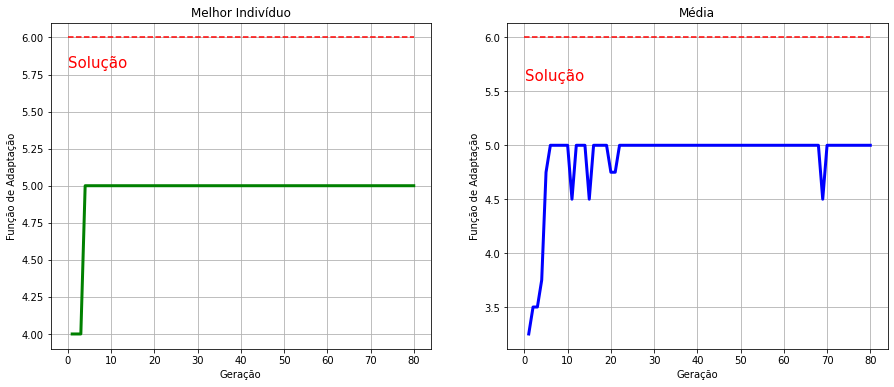


Indivíduo mais adaptado da última geração: [2, 4, 3, 1]
Valor da sua função de adaptação: 5



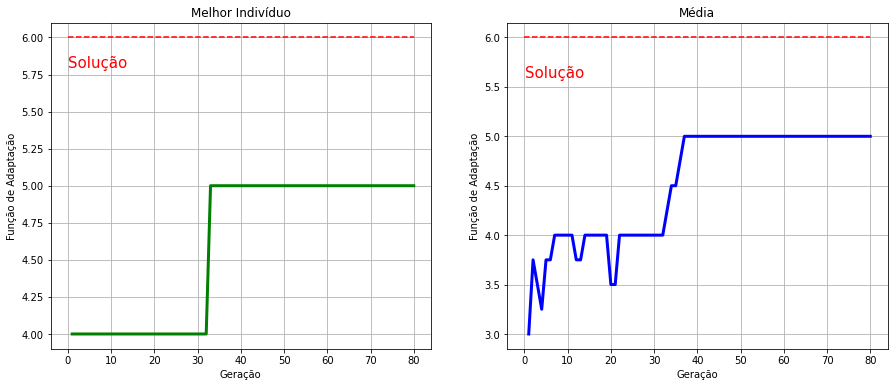


Indivíduo mais adaptado da última geração: [1, 3, 4, 2]
Valor da sua função de adaptação: 5



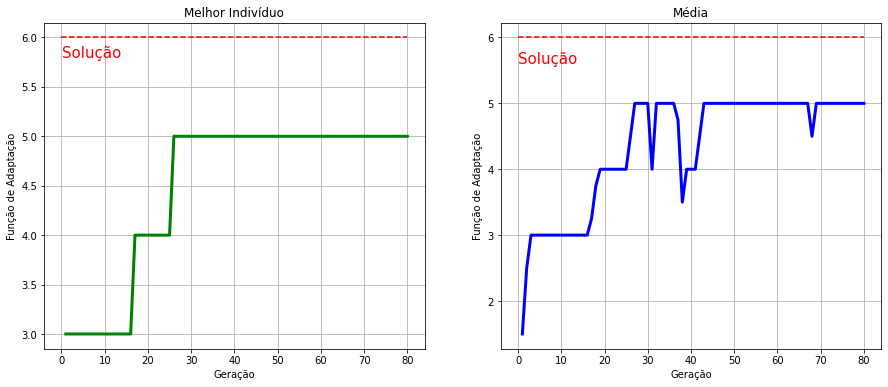


Indivíduo mais adaptado da última geração: [3, 1, 2, 4]
Valor da sua função de adaptação: 5



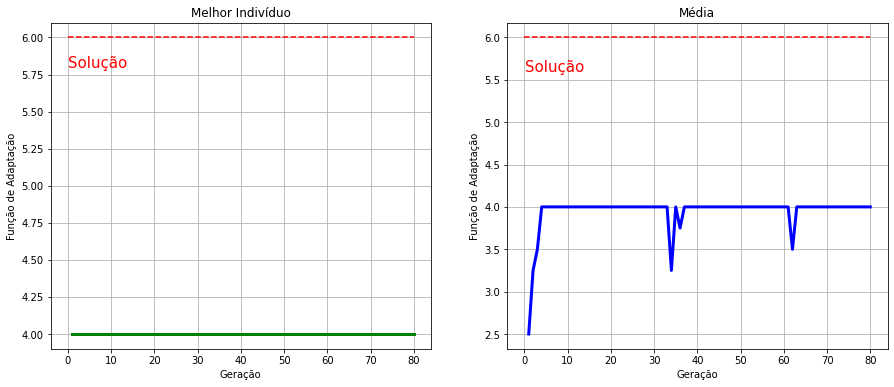


Indivíduo mais adaptado da última geração: [2, 2, 3, 1]
Valor da sua função de adaptação: 4



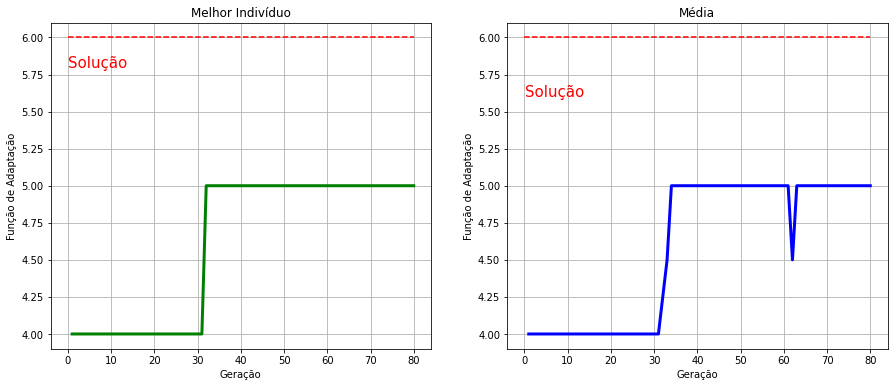


Indivíduo mais adaptado da última geração: [1, 4, 2, 3]
Valor da sua função de adaptação: 5



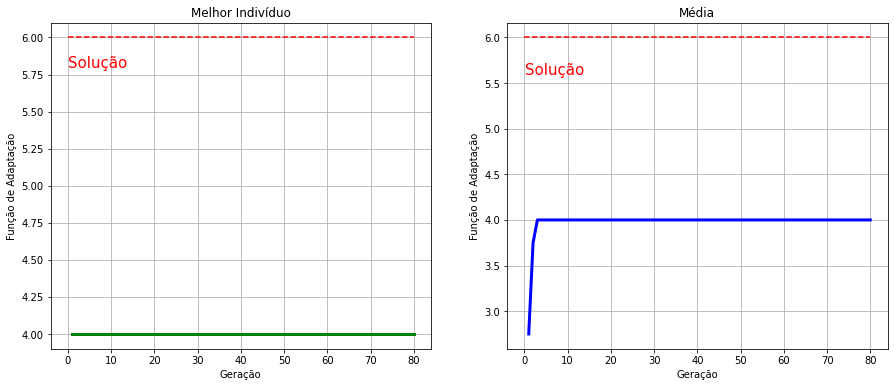


Indivíduo mais adaptado da última geração: [1, 3, 1, 3]
Valor da sua função de adaptação: 4



In [ ]:
for i in range(10):
  genetico(tam_pop=4, n_geracoes=80, p_crossover=0.7, p_mutacao=0.01, elitismo=True)

##### Probabilidade de Crossover

**Aumentamos a probabilidade de crossover, de 70% para 85%.**

Chegamos à solução em 3 execuções.
Mas não sentimos grandes diferenças em relação aos gráficos, principalmente o de média.

Talvez uma taxa maior de crossover, junto com o elitismo, permita que boas características dos indivíduos sejam trocadas mais rapidamente e por isso chegamos à 3 soluções.

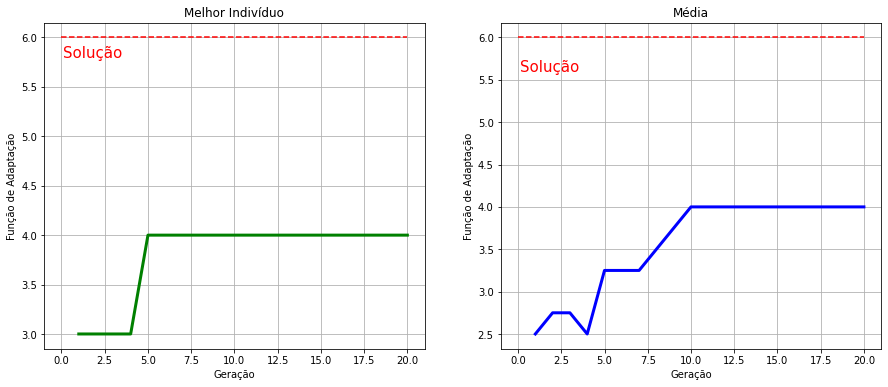


Indivíduo mais adaptado da última geração: [1, 3, 2, 4]
Valor da sua função de adaptação: 4



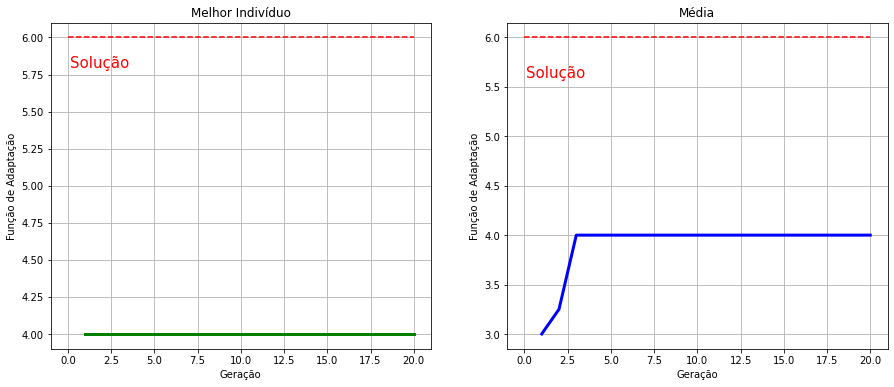


Indivíduo mais adaptado da última geração: [4, 1, 3, 1]
Valor da sua função de adaptação: 4



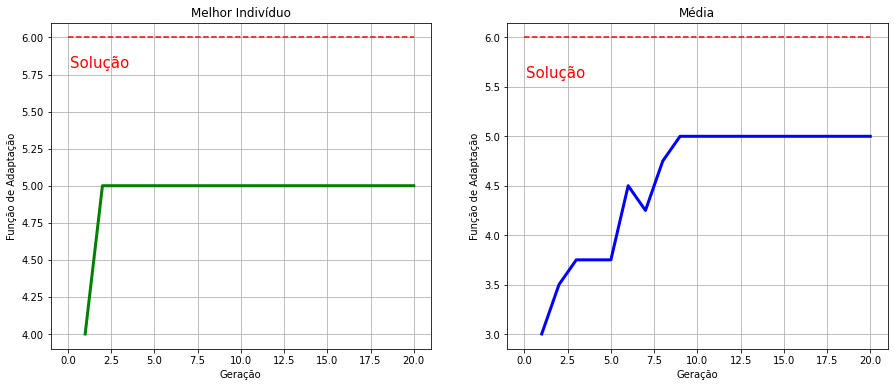


Indivíduo mais adaptado da última geração: [4, 1, 4, 2]
Valor da sua função de adaptação: 5



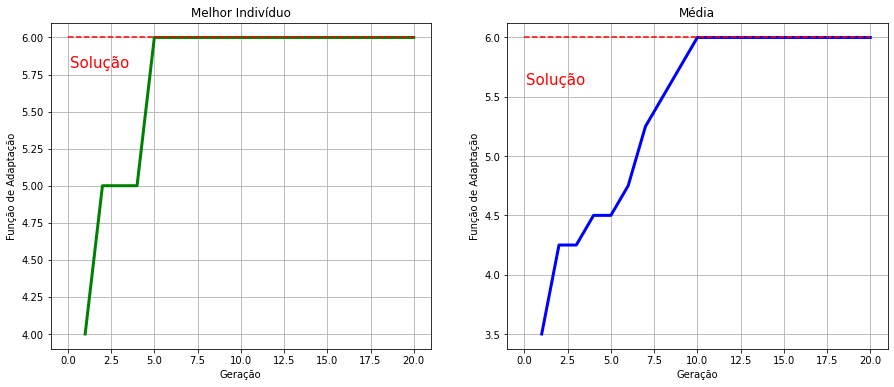


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



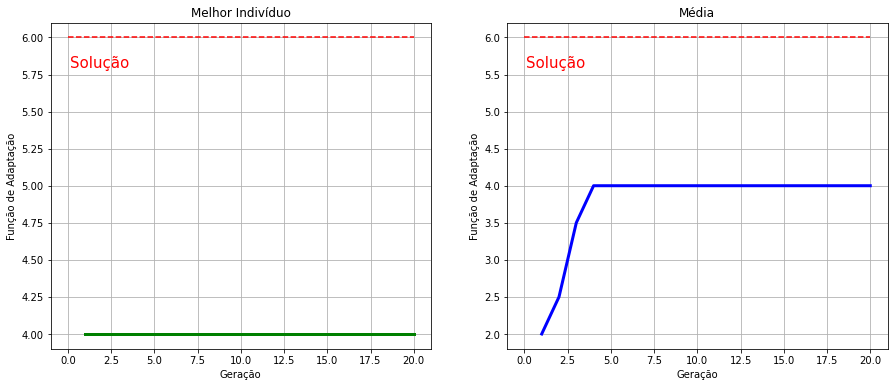


Indivíduo mais adaptado da última geração: [1, 4, 4, 1]
Valor da sua função de adaptação: 4



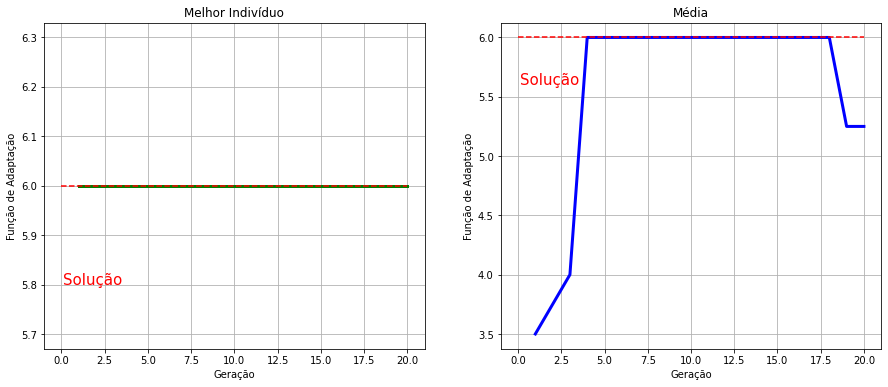


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



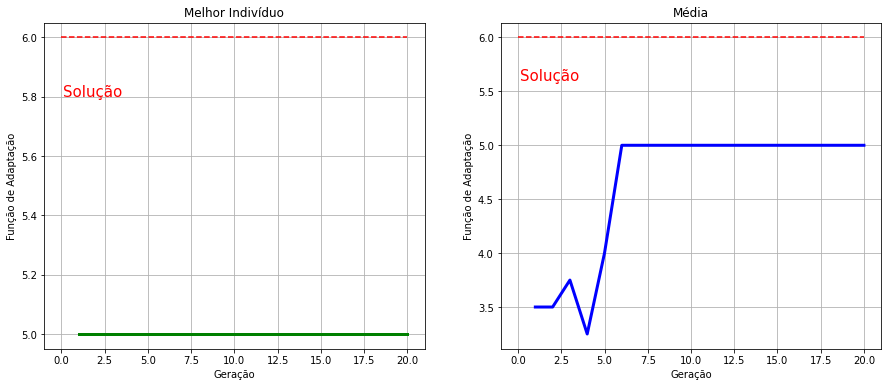


Indivíduo mais adaptado da última geração: [2, 4, 1, 1]
Valor da sua função de adaptação: 5



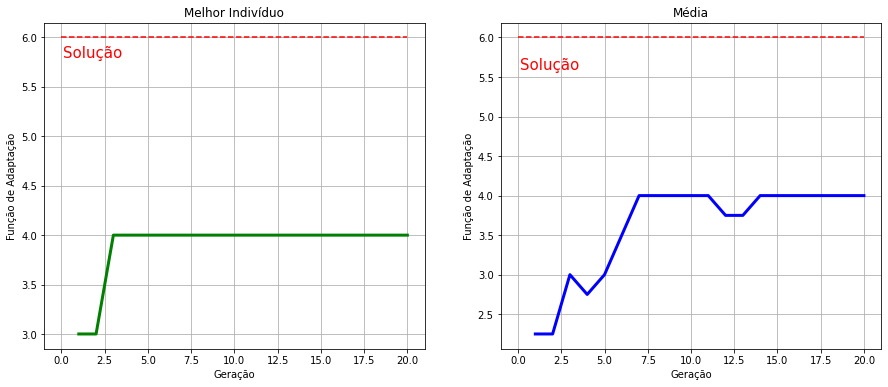


Indivíduo mais adaptado da última geração: [3, 1, 2, 2]
Valor da sua função de adaptação: 4



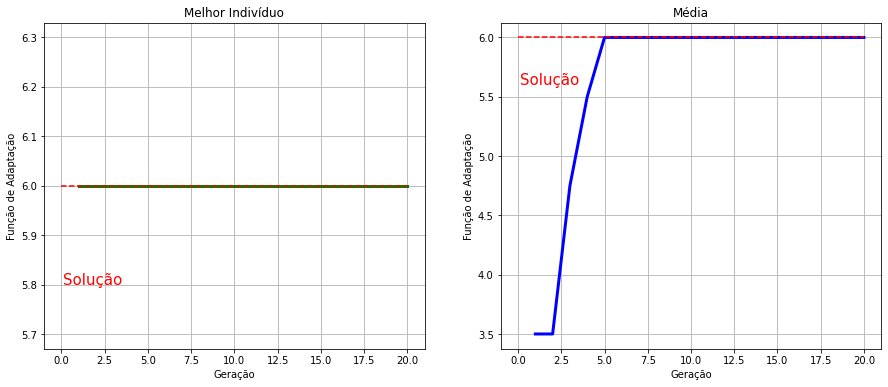


Indivíduo mais adaptado da última geração: [2, 4, 1, 3]
Valor da sua função de adaptação: 6



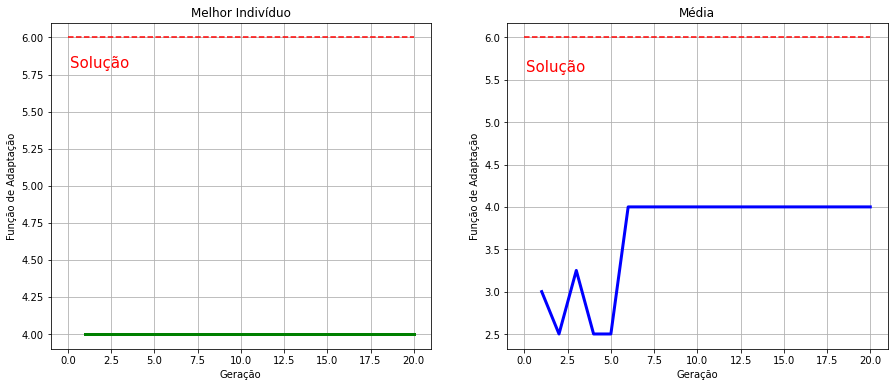


Indivíduo mais adaptado da última geração: [4, 3, 1, 4]
Valor da sua função de adaptação: 4



In [ ]:
for i in range(10):
  genetico(tam_pop=4, n_geracoes=20, p_crossover=0.85, p_mutacao=0.01, elitismo=True)

##### Probabilidade de Mutação

**Aumentamos a probabilidade de mutação, de 1% para 5%.**

Chegamos a solução em 2 execuções. Além disso percebemos que a média das gerações não convergiu tanto quanto antes, principalmente nas últimas gerações.

Novamente, assim como quando aumentamos a probabilidade de crossover, aumentar a probabilidade de mutação, aumenta as chances de surgirem indivíduos diferentes, melhores ou piores, mas o elitismo ativado ajuda a equilibrar essa aleatoriedade e garantir que o algoritmo vai convergir para indivíduos melhores.

A pequena divergência das médias nas últimas gerações se deve à natureza da mutação, que mesmo numa população muito homogênea pode gerar um indivíduo diferente dos outros aleatoriamente, algo que o crossover não é capaz de fazer.

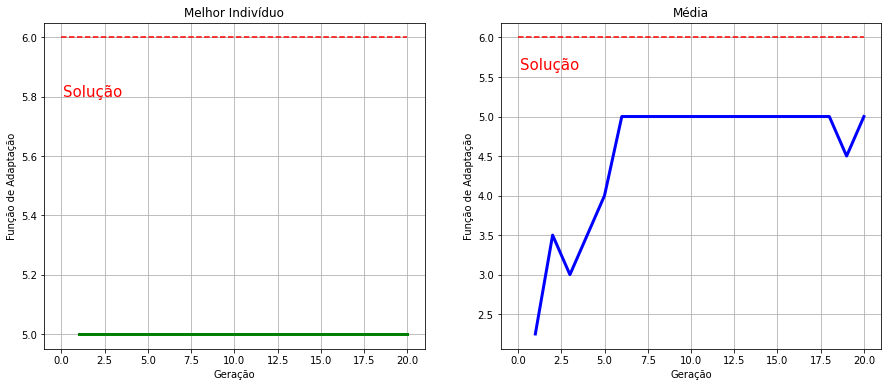


Indivíduo mais adaptado da última geração: [1, 3, 4, 2]
Valor da sua função de adaptação: 5



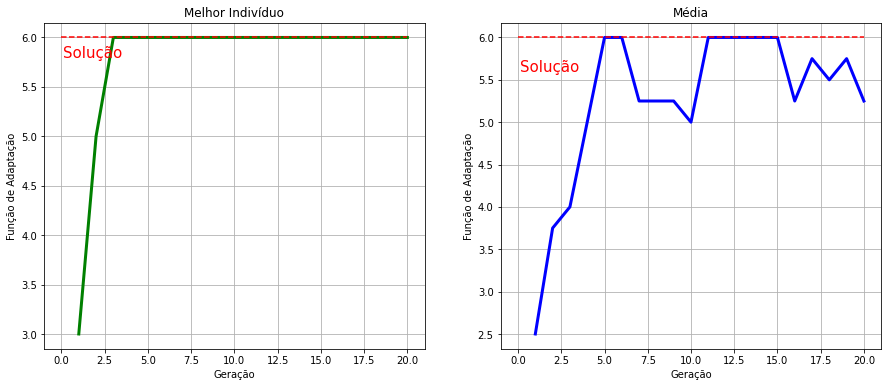


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



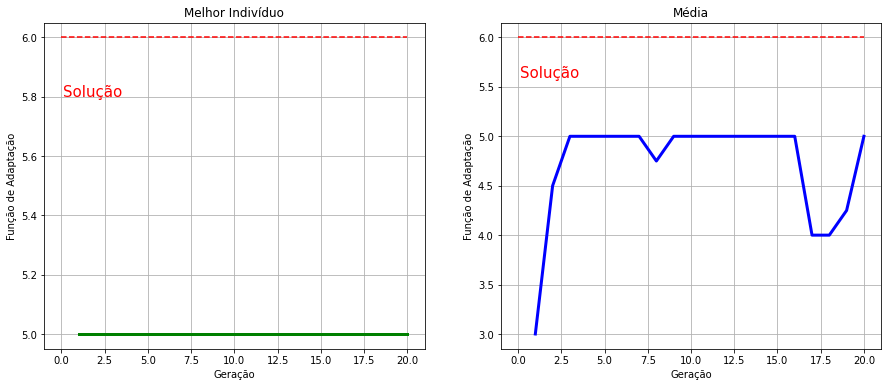


Indivíduo mais adaptado da última geração: [1, 4, 2, 3]
Valor da sua função de adaptação: 5



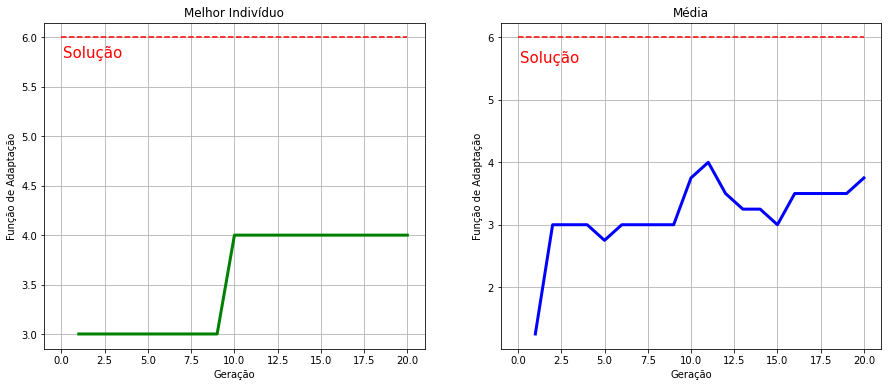


Indivíduo mais adaptado da última geração: [2, 1, 1, 4]
Valor da sua função de adaptação: 4



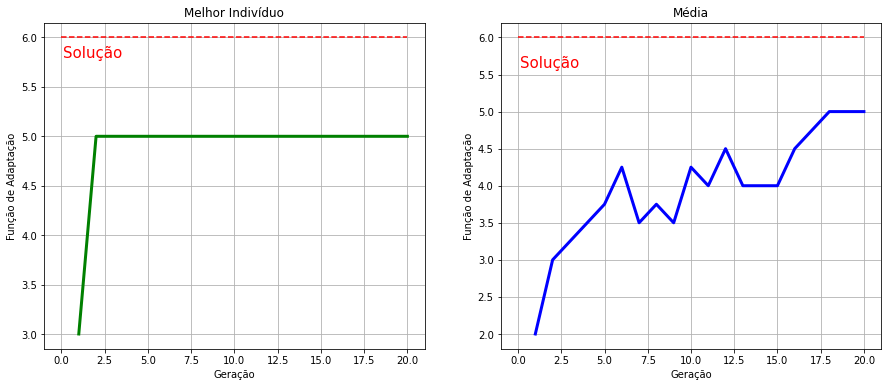


Indivíduo mais adaptado da última geração: [2, 4, 1, 4]
Valor da sua função de adaptação: 5



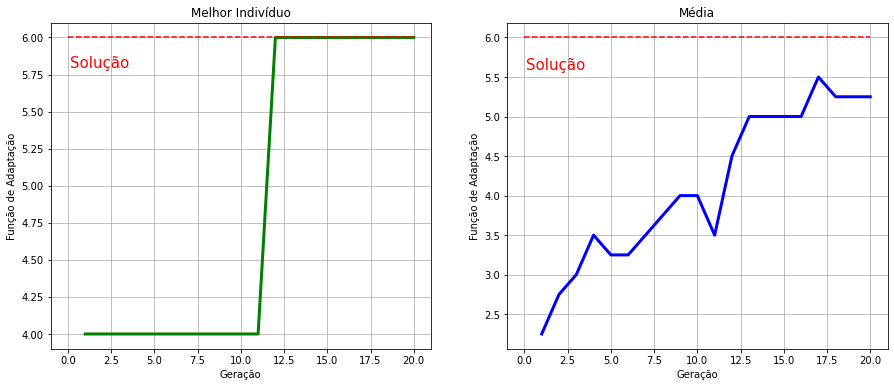


Indivíduo mais adaptado da última geração: [3, 1, 4, 2]
Valor da sua função de adaptação: 6



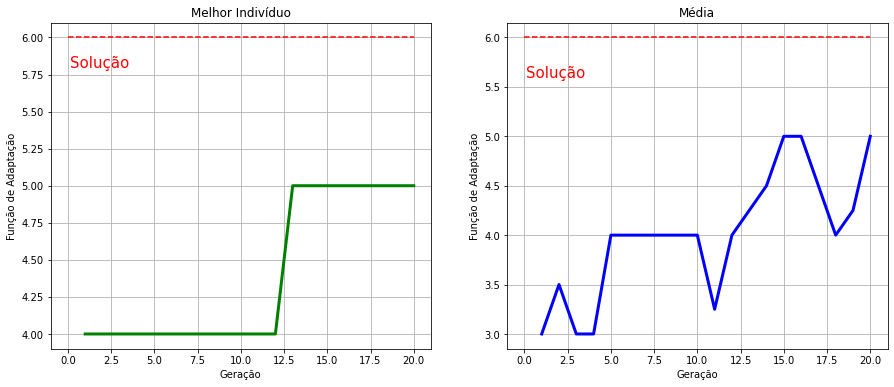


Indivíduo mais adaptado da última geração: [2, 4, 3, 1]
Valor da sua função de adaptação: 5



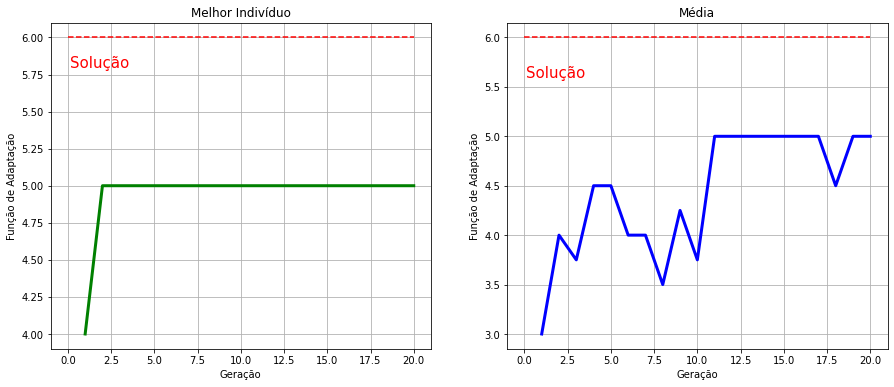


Indivíduo mais adaptado da última geração: [3, 1, 4, 4]
Valor da sua função de adaptação: 5



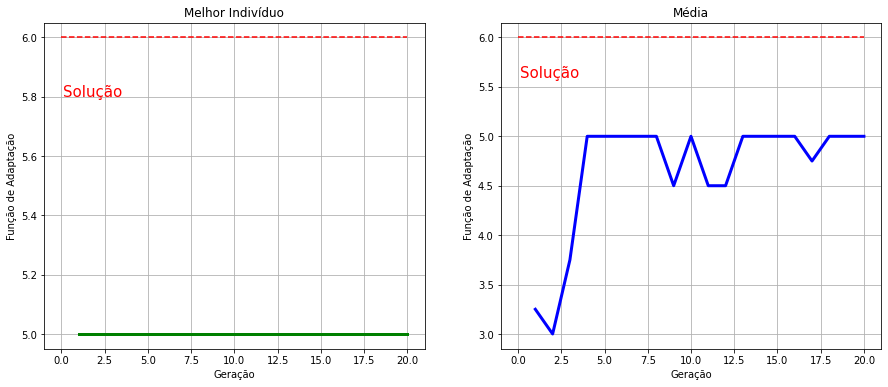


Indivíduo mais adaptado da última geração: [2, 4, 1, 4]
Valor da sua função de adaptação: 5



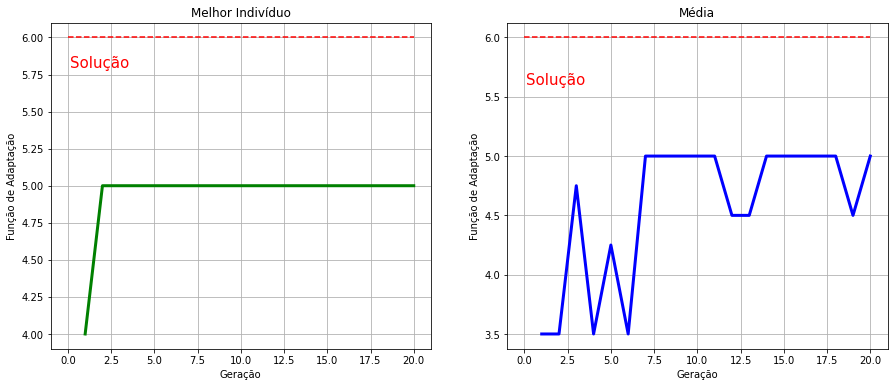


Indivíduo mais adaptado da última geração: [4, 2, 1, 3]
Valor da sua função de adaptação: 5



In [ ]:
for i in range(10):
  genetico(tam_pop=4, n_geracoes=20, p_crossover=0.7, p_mutacao=0.05, elitismo=True)

### (f)
*Faça uma análise para os tabuleiros com 8, 16 e 32 rainhas.*

#### 8 Rainhas

Quando tínhamos 4 rainhas, havia $4^4 = 256$ indivíduos possíveis de serem gerados. Com 8 rainhas, é possível gerar $8^8 = 16777216$ indivíduos diferentes, ou seja, um número 65536 vezes maior. 

Por isso fizemos um "upgrade" nos valores do tamanho da população(16) e do número de gerações(100).

Por fim, decidimos manter a probabilidade de crossover em 0.8 e de mutação em 0.05. Mantivemos assim nos exemplos seguintes também.

\

Conseguimos chegar em solução em apenas 1 das 10 execuções. Mas na maioria dos casos, o melhor indivíduo estava perto da solução (sempre a menos de 3 unidades do valor de adaptação "perfeito"). Levando em conta o aumento exponencial de possibilidades de indivíduos, consideramos que o algoritmo até teve um bom desempenho.

\
Além disso, como o número de gerações foi maior e a função de adaptação variava numa gama maior de valores, foi possível observar de maneira mais clara a convergência das médias ao longo das gerações.

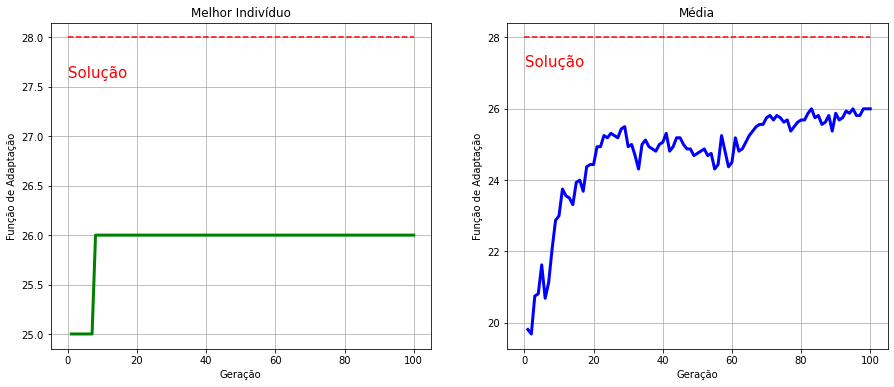


Indivíduo mais adaptado da última geração: [2, 3, 7, 4, 1, 8, 6, 5]
Valor da sua função de adaptação: 26



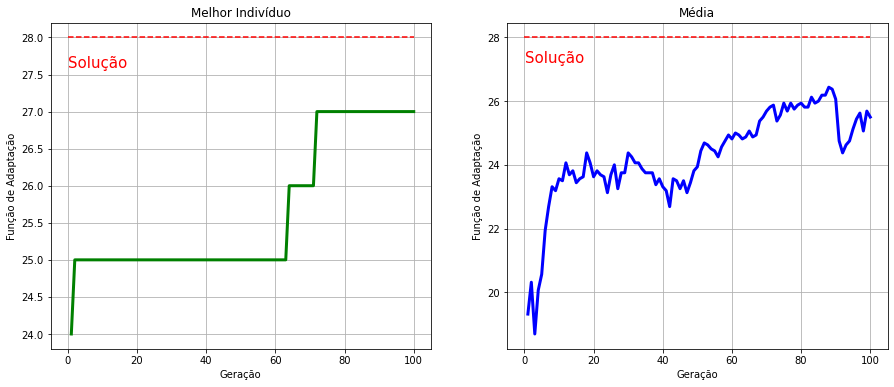


Indivíduo mais adaptado da última geração: [1, 4, 7, 5, 2, 2, 6, 3]
Valor da sua função de adaptação: 27



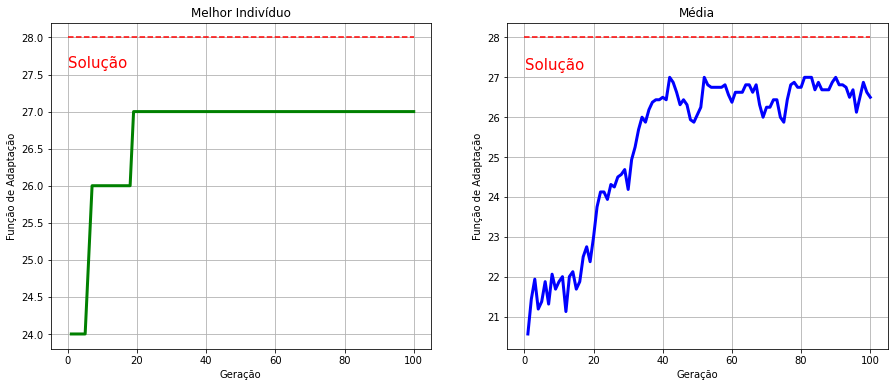


Indivíduo mais adaptado da última geração: [3, 6, 4, 1, 8, 6, 2, 7]
Valor da sua função de adaptação: 27



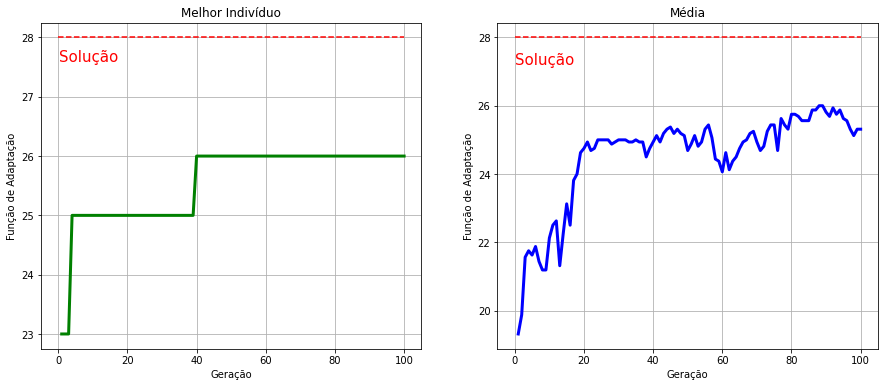


Indivíduo mais adaptado da última geração: [2, 5, 3, 8, 7, 4, 1, 6]
Valor da sua função de adaptação: 26



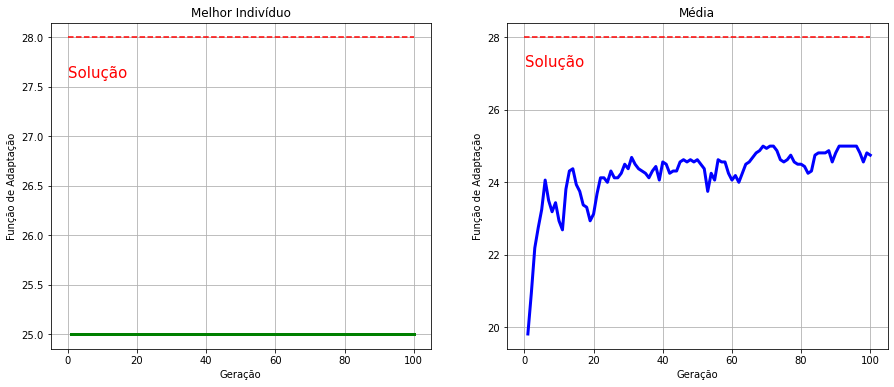


Indivíduo mais adaptado da última geração: [5, 3, 2, 7, 4, 1, 3, 8]
Valor da sua função de adaptação: 25



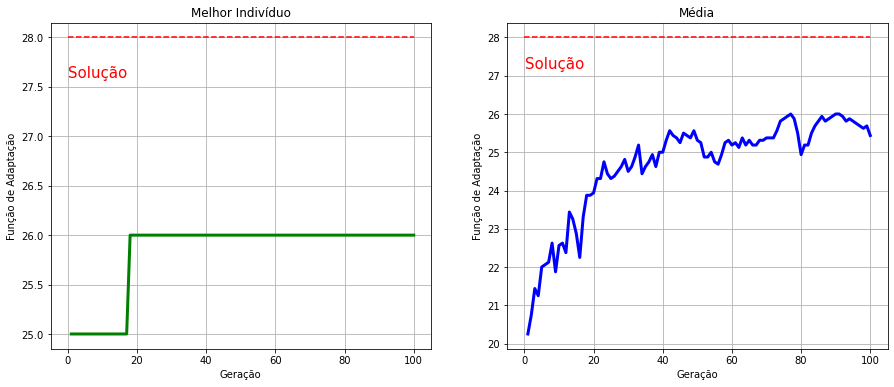


Indivíduo mais adaptado da última geração: [8, 2, 7, 3, 7, 2, 4, 6]
Valor da sua função de adaptação: 26



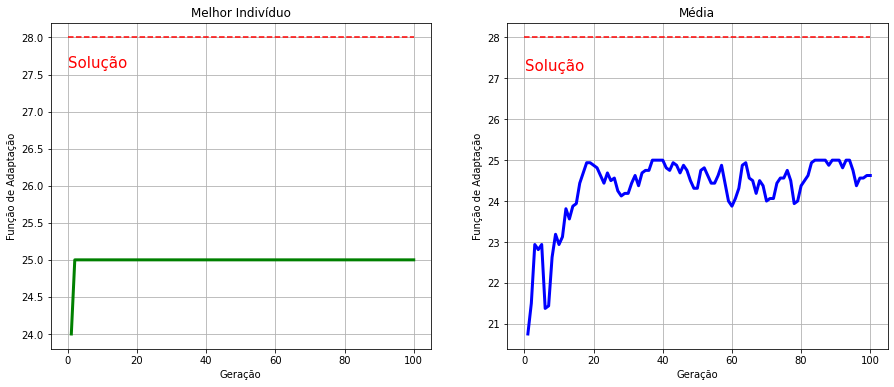


Indivíduo mais adaptado da última geração: [1, 3, 5, 7, 4, 6, 3, 5]
Valor da sua função de adaptação: 25



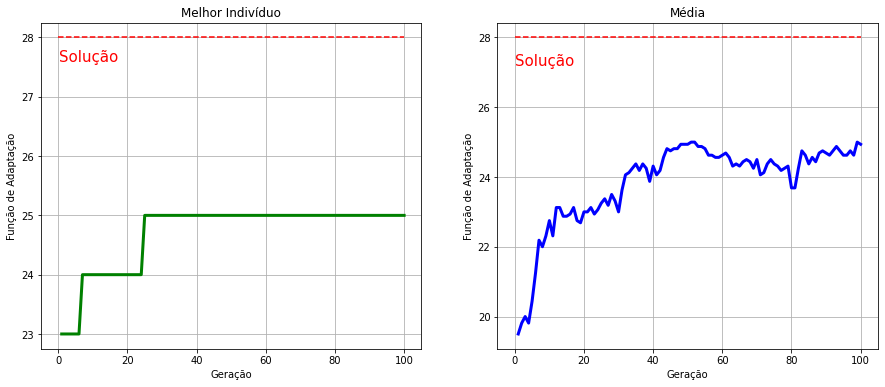


Indivíduo mais adaptado da última geração: [5, 1, 1, 7, 6, 2, 3, 8]
Valor da sua função de adaptação: 25



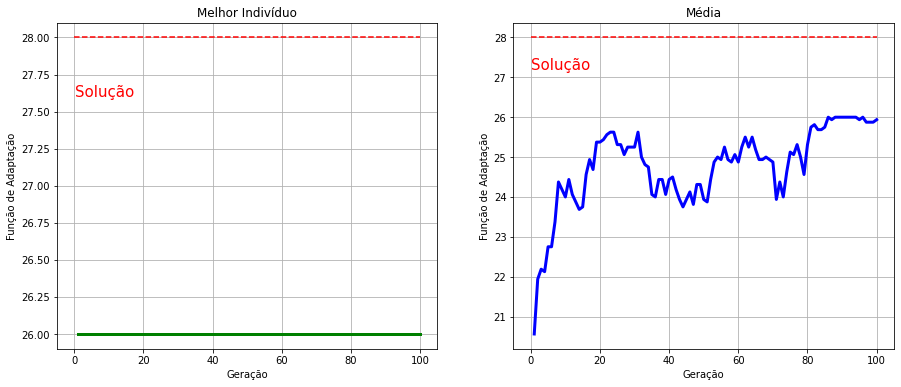


Indivíduo mais adaptado da última geração: [3, 1, 6, 4, 7, 4, 8, 5]
Valor da sua função de adaptação: 26



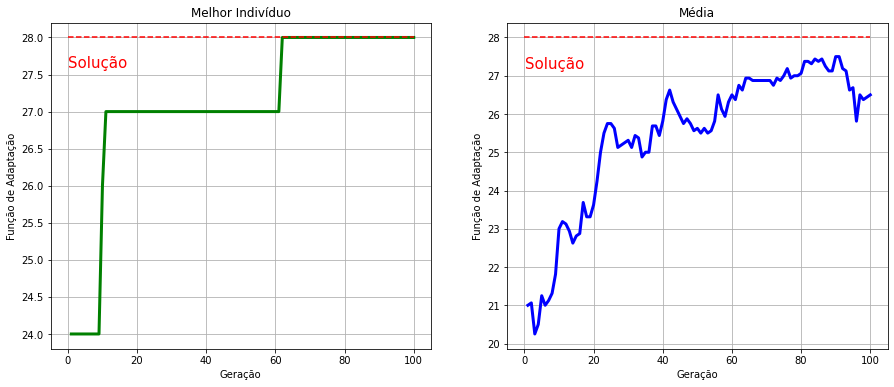


Indivíduo mais adaptado da última geração: [6, 3, 1, 8, 5, 2, 4, 7]
Valor da sua função de adaptação: 28



In [ ]:
N_RAINHAS = 8
for i in range(10):
  genetico(tam_pop=16, n_geracoes=100, p_crossover=0.8, p_mutacao=0.05, elitismo=True)

#### 16 Rainhas

Com 16 rainhas, temos uma gama de indivíduos diferentes que é aproximadamente $7.2 \cdot 10^{16}$ vezes maior do que com 4 rainhas.

Por isso, novamente, fizemos um "upgrade" nos valores do tamanho da população (64) e do número de gerações (500).

Por fim, decidimos manter a probabilidade de crossover em 0.8 e de mutação em 0.05.

\

As diferenças começam pelo tempo de execução. Dessa vez, gastamos 47 segundos para realizar as execuções, enquanto das outras vezes a execução foi quase instantânea. Em relação à execução original com 4 rainhas, estamos trabalhando com $4\ rainhas \cdot\ 16\ indivíduos \cdot\ 25\ gerações = 1600$ vezes mais floats do que antes, o que justifica esse tempo a mais.

Além disso verificamos que a maior parte dos ganhos (mudanças positivas de valor) nos 2 gráficos (ou o cotovelo da curva) ocorrem até a geração 100 aproximadamente. A partir daí os ganhos são menores. Para a média isso não faz muita diferença, mas para o gráfico de melhor indivíduo sim, já que um pequeno ganho pode ser o que faltava para chegar na solução.

Nas 10 execuções, o algoritmo continuou a 3 unidades de distância ou menos do valor perfeito de adaptação. No entanto não chegamos a soluções em nenhuma das 10 execuções.

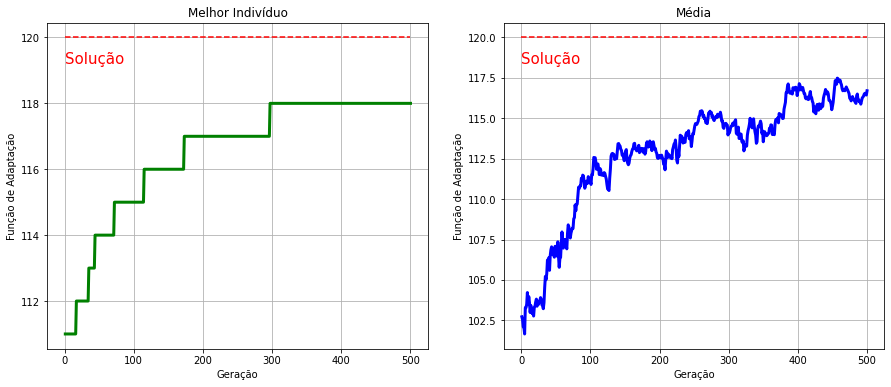


Indivíduo mais adaptado da última geração: [10, 9, 1, 14, 5, 2, 6, 12, 12, 15, 3, 7, 4, 8, 16, 13]
Valor da sua função de adaptação: 118



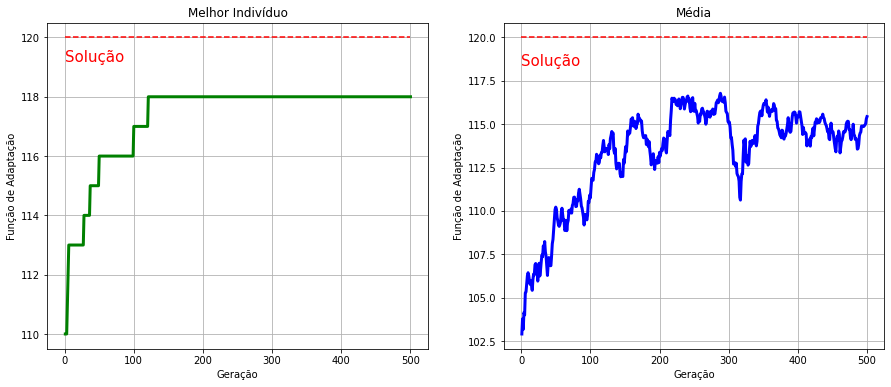


Indivíduo mais adaptado da última geração: [13, 8, 14, 7, 2, 10, 6, 15, 3, 5, 9, 12, 5, 16, 11, 3]
Valor da sua função de adaptação: 118



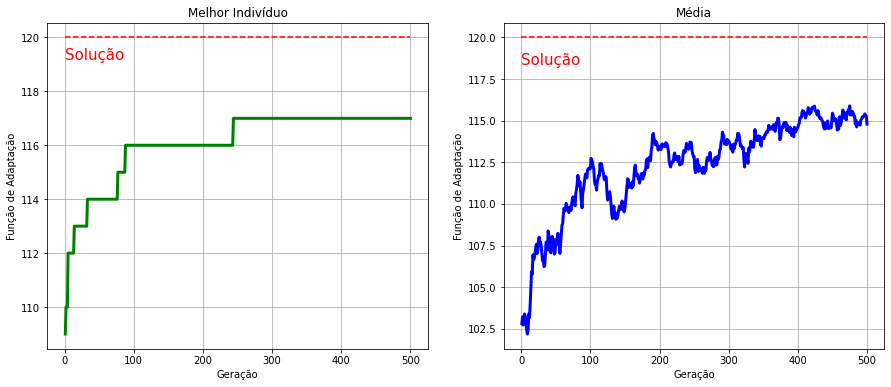


Indivíduo mais adaptado da última geração: [12, 14, 6, 8, 3, 15, 13, 16, 16, 11, 8, 5, 1, 9, 7, 10]
Valor da sua função de adaptação: 117



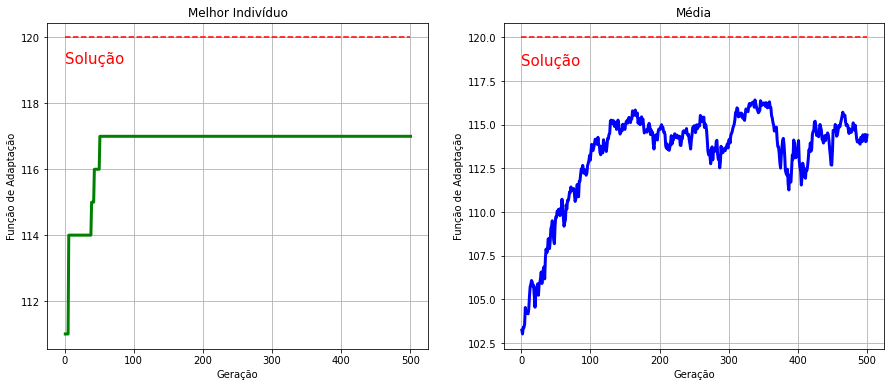


Indivíduo mais adaptado da última geração: [10, 3, 1, 8, 13, 9, 12, 2, 4, 7, 3, 11, 15, 2, 6, 5]
Valor da sua função de adaptação: 117



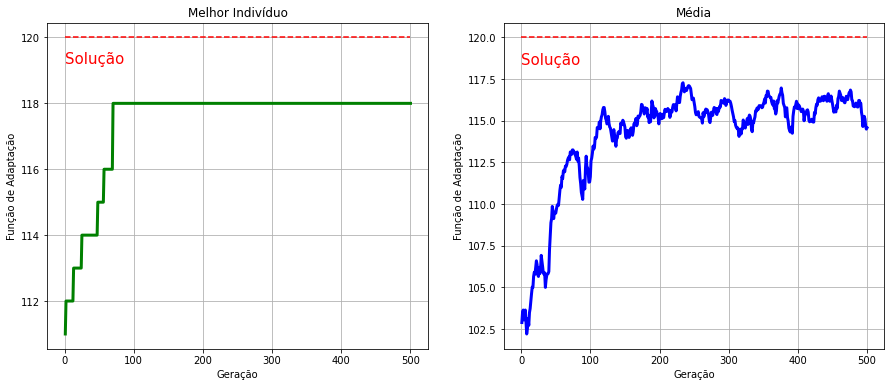


Indivíduo mais adaptado da última geração: [9, 1, 3, 13, 6, 12, 2, 15, 7, 14, 8, 10, 16, 1, 11, 5]
Valor da sua função de adaptação: 118



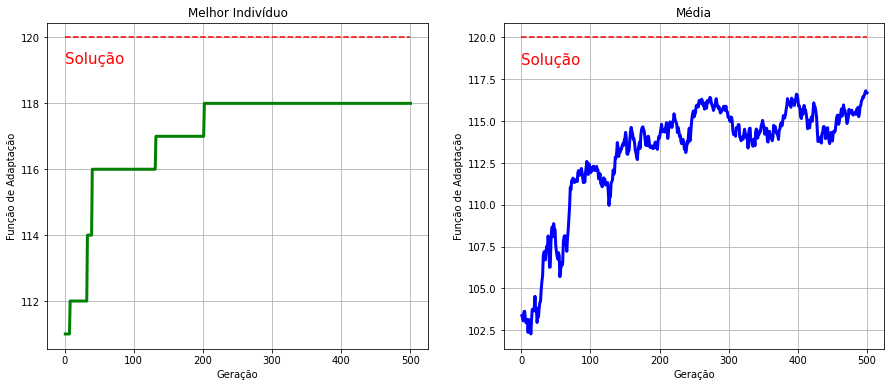


Indivíduo mais adaptado da última geração: [9, 4, 16, 1, 11, 6, 8, 3, 12, 14, 7, 10, 13, 2, 5, 15]
Valor da sua função de adaptação: 118



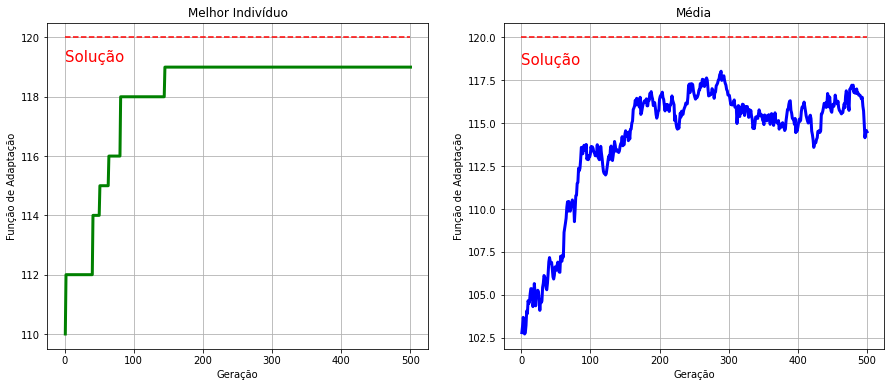


Indivíduo mais adaptado da última geração: [10, 2, 5, 8, 11, 1, 15, 7, 14, 3, 13, 9, 16, 6, 4, 12]
Valor da sua função de adaptação: 119



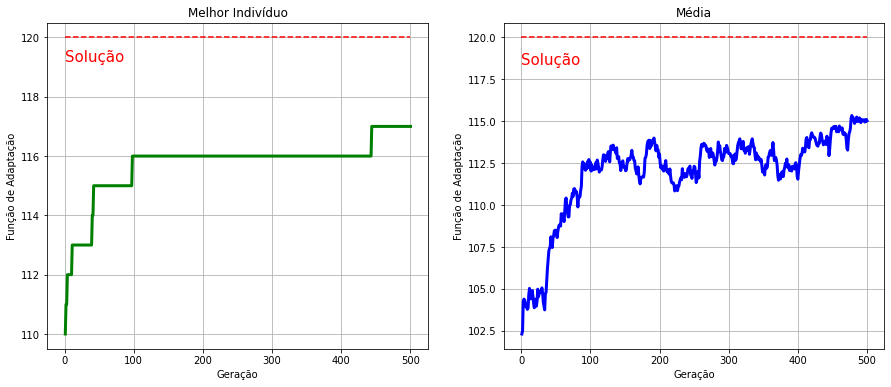


Indivíduo mais adaptado da última geração: [7, 14, 4, 6, 16, 3, 10, 15, 2, 8, 1, 12, 9, 5, 7, 15]
Valor da sua função de adaptação: 117



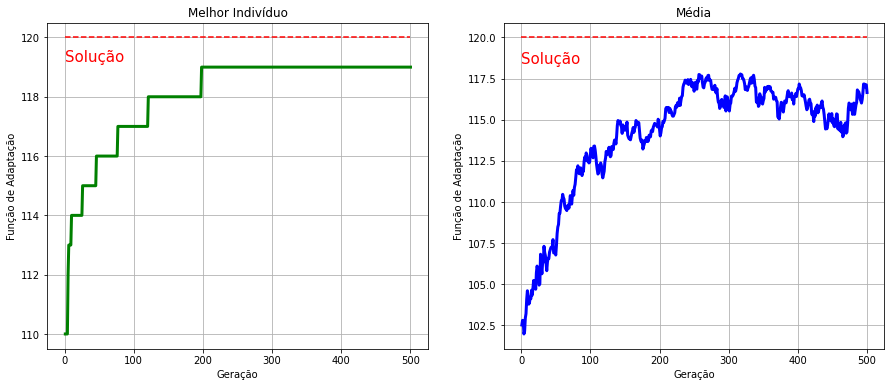


Indivíduo mais adaptado da última geração: [6, 1, 9, 15, 3, 8, 16, 2, 4, 11, 14, 5, 13, 10, 12, 2]
Valor da sua função de adaptação: 119



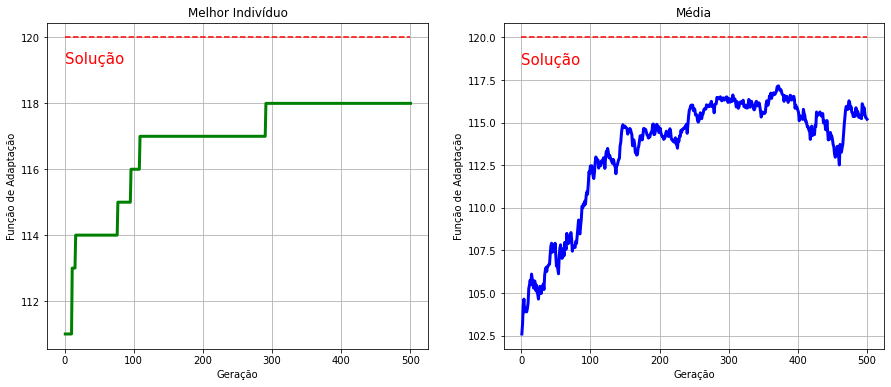


Indivíduo mais adaptado da última geração: [15, 4, 11, 9, 15, 13, 5, 2, 8, 1, 7, 3, 10, 14, 16, 6]
Valor da sua função de adaptação: 118



In [ ]:
N_RAINHAS = 16
for i in range(10):
  genetico(tam_pop=64, n_geracoes=500, p_crossover=0.8, p_mutacao=0.05, elitismo=True)

#### 32 Rainhas

Com 32 rainhas, temos uma gama de indivíduos diferentes que é aproximadamente $5.7 \cdot 10^{45}$ vezes maior do que com 4 rainhas.

Por isso, novamente, fizemos um "upgrade" nos valores do tamanho da população (128) e do número de gerações (1500).

Por fim, decidimos manter a probabilidade de crossover em 0.8 e de mutação em 0.05.

\
As diferenças começam pelo tempo de execução. Dessa vez, gastamos 15 minutos e 15 segundos para realizar as execuções. Em relação à execução original com 4 rainhas, estamos trabalhando com $8\ rainhas \cdot\ 32\ indivíduos \cdot\ 75\ gerações = 19200$ vezes mais floats do que antes, o que justifica esse tempo a mais.

Além disso verificamos que a maior parte dos ganhos (mudanças positivas de valor) nos 2 gráficos (ou o cotovelo da curva) ocorrem até a geração 400 aproximadamente.

Em relação ao gráfico de melhor indíviduo, foi possível observar uma maior frequência de crescimento em relação à geração com 16, 8 e 4 rainhas.

Nas 10 execuções, o algoritmo teve uma distância média até a solução maior em relação à análise de 16 rainhas. O melhor indivíduo estava sempre a menos de 10 unidades de distância do valor esperado. No entanto não chegamos a soluções em nenhuma das 10 execuções.


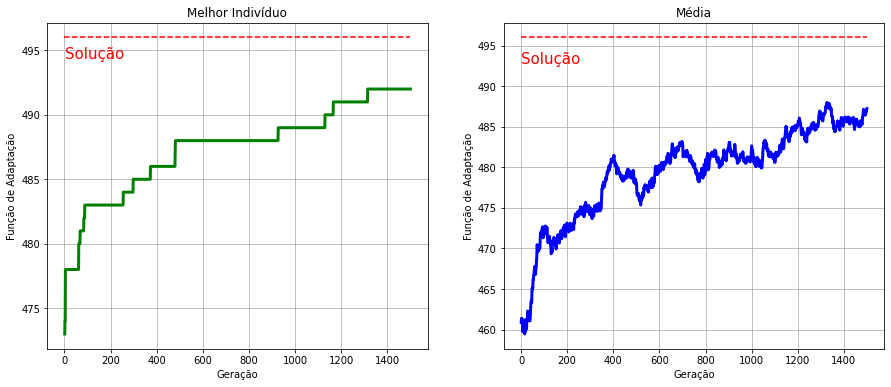


Indivíduo mais adaptado da última geração: [23, 6, 13, 7, 18, 4, 2, 29, 10, 28, 25, 5, 15, 1, 30, 24, 14, 3, 31, 27, 32, 3, 12, 10, 8, 20, 32, 16, 28, 9, 11, 22]
Valor da sua função de adaptação: 492



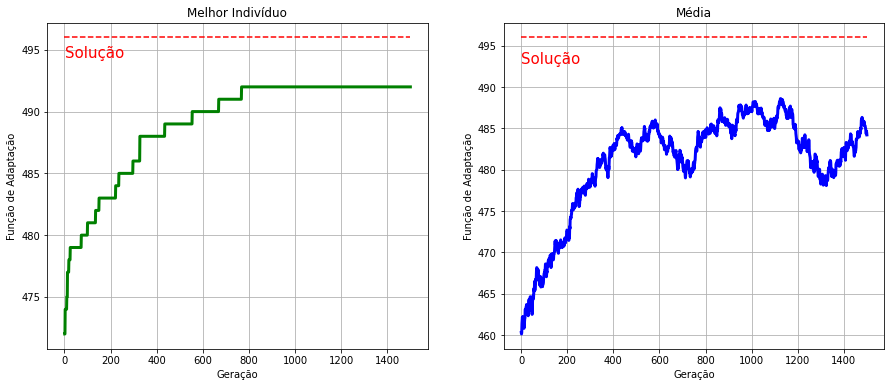


Indivíduo mais adaptado da última geração: [24, 20, 12, 9, 4, 28, 21, 19, 3, 1, 15, 32, 29, 6, 23, 29, 20, 13, 31, 26, 11, 17, 7, 25, 27, 22, 2, 28, 14, 10, 5, 30]
Valor da sua função de adaptação: 492



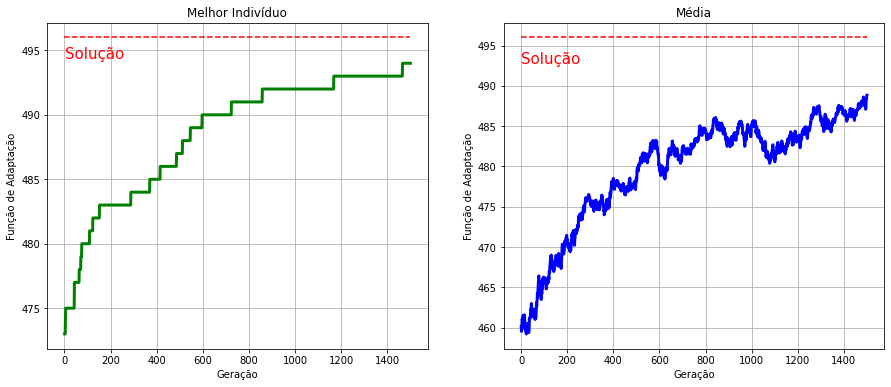


Indivíduo mais adaptado da última geração: [26, 22, 12, 6, 8, 14, 23, 30, 16, 11, 24, 31, 18, 32, 3, 13, 2, 5, 29, 31, 20, 28, 19, 10, 1, 4, 9, 17, 27, 7, 21, 15]
Valor da sua função de adaptação: 494



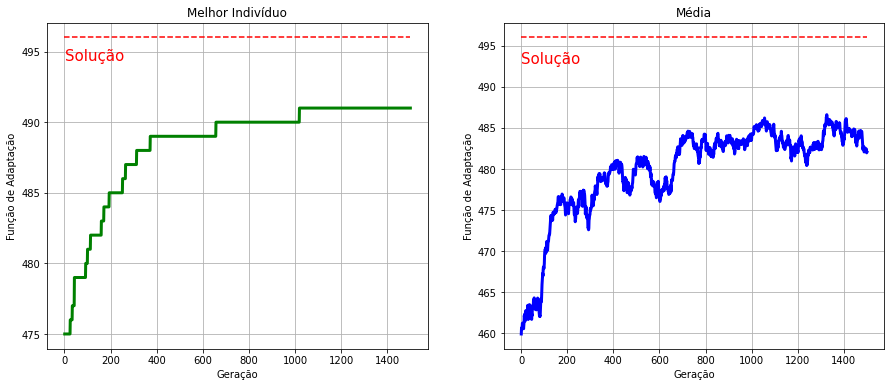


Indivíduo mais adaptado da última geração: [18, 25, 13, 19, 27, 14, 10, 2, 9, 30, 20, 16, 1, 32, 29, 14, 22, 4, 15, 1, 28, 2, 24, 26, 17, 3, 11, 7, 12, 3, 31, 21]
Valor da sua função de adaptação: 491



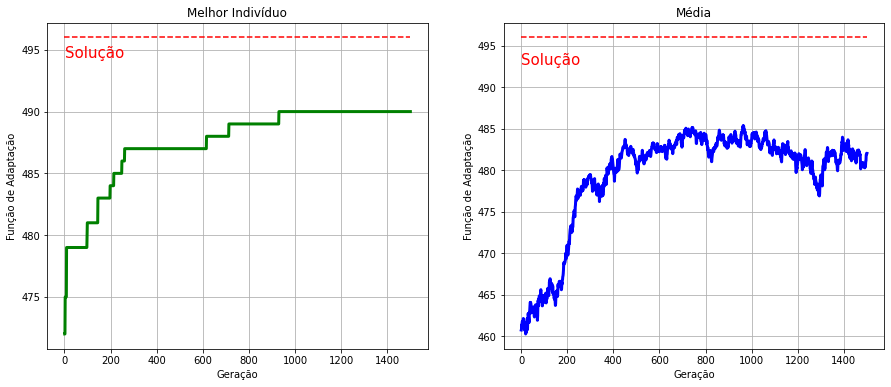


Indivíduo mais adaptado da última geração: [17, 32, 4, 8, 23, 5, 15, 6, 28, 19, 10, 7, 3, 29, 18, 16, 29, 31, 12, 7, 31, 14, 30, 2, 25, 22, 8, 13, 1, 9, 20, 26]
Valor da sua função de adaptação: 490



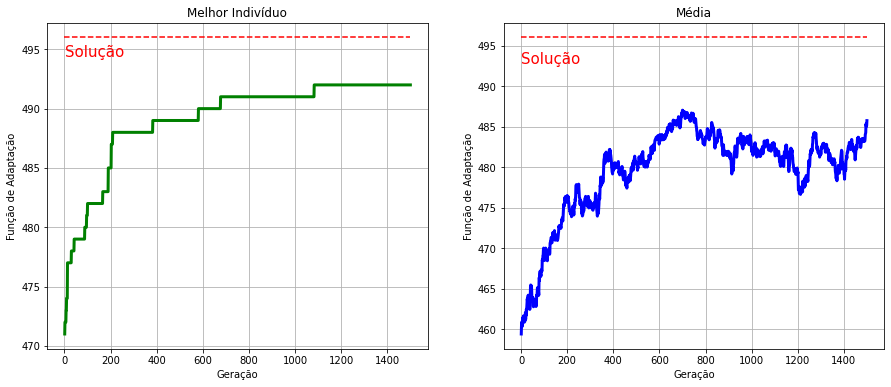


Indivíduo mais adaptado da última geração: [6, 11, 3, 26, 20, 2, 14, 24, 10, 27, 25, 23, 5, 17, 28, 22, 11, 4, 31, 9, 19, 32, 18, 21, 1, 16, 12, 21, 13, 8, 30, 15]
Valor da sua função de adaptação: 492



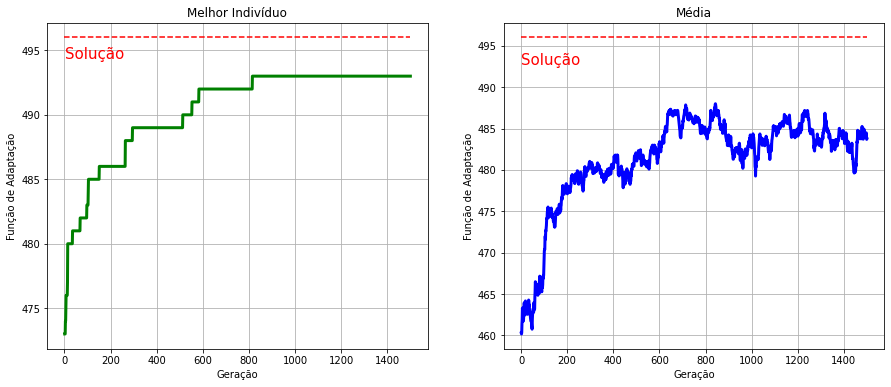


Indivíduo mais adaptado da última geração: [28, 13, 16, 9, 20, 31, 26, 4, 32, 11, 8, 24, 17, 3, 1, 30, 25, 27, 12, 14, 23, 25, 29, 19, 23, 2, 5, 7, 21, 10, 18, 6]
Valor da sua função de adaptação: 493



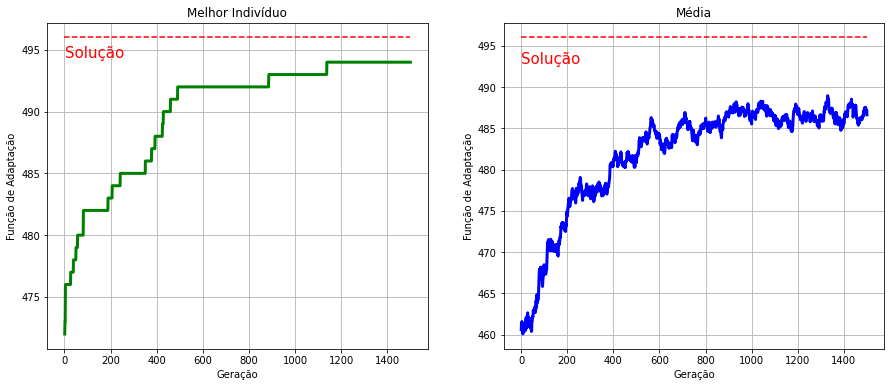


Indivíduo mais adaptado da última geração: [2, 30, 15, 6, 31, 19, 10, 18, 32, 24, 28, 9, 1, 8, 22, 31, 12, 17, 4, 11, 27, 20, 7, 29, 3, 12, 16, 5, 21, 26, 14, 25]
Valor da sua função de adaptação: 494



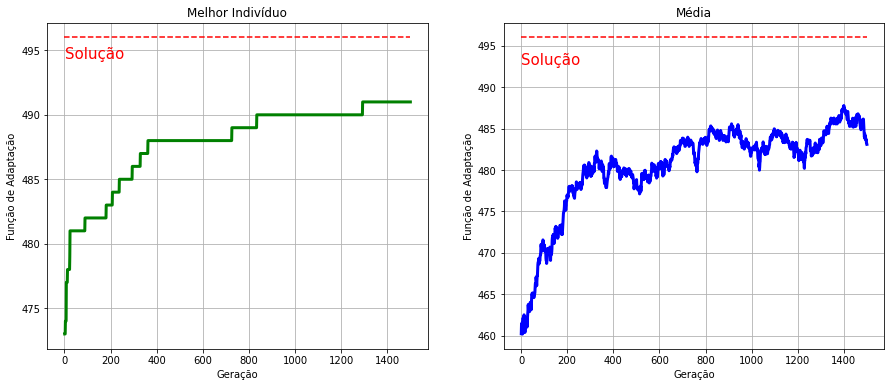


Indivíduo mais adaptado da última geração: [19, 11, 3, 26, 17, 12, 31, 18, 28, 21, 1, 29, 8, 13, 9, 3, 32, 22, 24, 31, 15, 23, 30, 4, 10, 7, 2, 20, 5, 2, 27, 14]
Valor da sua função de adaptação: 491



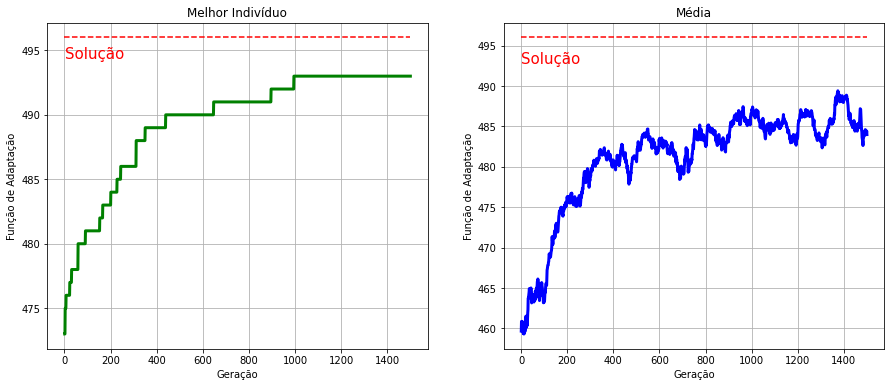


Indivíduo mais adaptado da última geração: [7, 11, 6, 19, 9, 22, 3, 21, 7, 27, 32, 17, 25, 25, 15, 8, 4, 1, 26, 2, 14, 30, 13, 23, 16, 20, 29, 5, 24, 31, 28, 12]
Valor da sua função de adaptação: 493



In [ ]:
N_RAINHAS = 32
for i in range(10):
  genetico(tam_pop=128, n_geracoes=1500, p_crossover=0.8, p_mutacao=0.05, elitismo=True)